# PROJECT: SALARY PREDICTİON WITH MACHINE LEARNING

In [1201]:
# Business Problem

# Baseball with salary information and career statistics for 1986
# Can a machine learning project be carried out for salary estimates of players?

# Dataset story

# This dataset was originally taken from the StatLib library at Carnegie Mellon University.
# The dataset is part of the data used in the 1988 ASA Graphics Section Poster Session.
# Salary data originally from Sports Illustrated, April 20, 1987.
# 1986 and career statistics, published by Collier Books, Macmillan Publishing Company, New York
# Obtained from the 1987 Baseball Encyclopedia Update.


# AtBat: Number of hits with a baseball bat during the 1986-1987 season
# Hits: Number of hits in the 1986-1987 season
# HmRun: Most valuable hits in the 1986-1987 season
# Runs: The points he earned for his team in the 1986-1987 season
# RBI: Number of players a batsman had jogged when he hit
# Walks: Number of mistakes made by the opposing player
# Years: Player's playing time in major league (years)
# CAtBat: Number of hits during a player's career
# CHits: The number of hits the player has made throughout his career
# CHmRun: The player's most valuable hit during his career
# CRuns: Points earned by the player during his career
# CRBI: The number of players the player has made during his career
# CWalks: Number of mistakes the player has made to the opposing player during their career
# League: A factor with A and N levels showing the league in which the player played until the end of the season
# Division: A factor with levels E and W indicating the position played by the player at the end of 1986
# PutOuts: Helping your teammate in-game
# Assists: Number of assists made by the player in the 1986-1987 season
# Errors: Player's number of errors in the 1986-1987 season
# Salary: The salary of the player in the 1986-1987 season (over thousand)
# NewLeague: a factor with A and N levels indicating the player's league at the start of the 1987 season

In [1202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [1203]:
df = pd.read_csv("hitters.csv")

# Data preprocessing

In [1204]:
def check_df(dataframe, head = 5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.head(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.95, 0.99, 1]).T)

In [1205]:
check_df(df)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head #####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    32

In [1206]:
def grab_col_names(dataframe, categorical_threshold = 10, cardinal_threshold = 20):
    categorical_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    
    numeric_looking_but_categorical = [col for col in dataframe.columns if dataframe[col].dtype != "O" and dataframe[col].nunique() < categorical_threshold]
    
    categorical_looking_but_cardinal = [col for col in dataframe.columns  if dataframe[col].dtype == "O" and dataframe[col].nunique() > cardinal_threshold]
    
    categorical_cols = categorical_cols + numeric_looking_but_categorical
    
    categorical_cols = [col for col in categorical_cols if col not in categorical_looking_but_cardinal]
    
    numeric_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    
    numeric_cols = [col for col in numeric_cols if col not in numeric_looking_but_categorical]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"Categorical Columns: {len(categorical_cols)}")
    print(f"Numeric Columns: {len(numeric_cols)}")
    print(f"Categorical Looking but Cardinal: {len(categorical_looking_but_cardinal)}")
    print(f"Numeric Looking but Categorical: {len(numeric_looking_but_categorical)}")
    return categorical_cols, numeric_cols, categorical_looking_but_cardinal
    

In [1207]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
Categorical Columns: 3
Numeric Columns: 17
Categorical Looking but Cardinal: 0
Numeric Looking but Categorical: 0


In [1208]:
cat_cols

['League', 'Division', 'NewLeague']

In [1209]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [1210]:
cat_but_car

[]

In [1211]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.00,380.93,153.40,16.00,255.25,379.50,512.00,687.00
Hits,322.00,101.02,46.45,1.00,64.00,96.00,137.00,238.00
HmRun,322.00,10.77,8.71,0.00,4.00,8.00,16.00,40.00
Runs,322.00,50.91,26.02,0.00,30.25,48.00,69.00,130.00
RBI,322.00,48.03,26.17,0.00,28.00,44.00,64.75,121.00
Walks,322.00,38.74,21.64,0.00,22.00,35.00,53.00,105.00
Years,322.00,7.44,4.93,1.00,4.00,6.00,11.00,24.00
CAtBat,322.00,2648.68,2324.21,19.00,816.75,1928.00,3924.25,14053.00
CHits,322.00,717.57,654.47,4.00,209.00,508.00,1059.25,4256.00
CHmRun,322.00,69.49,86.27,0.00,14.00,37.50,90.00,548.00


## Analyze the numerical and categorical variables.

In [1212]:
def categorical_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                       "Ratio" : dataframe[col_name].value_counts()/ len(dataframe)}))
    
    if plot: 
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block=True)

   League  Ratio
A     175   0.54
N     147   0.46


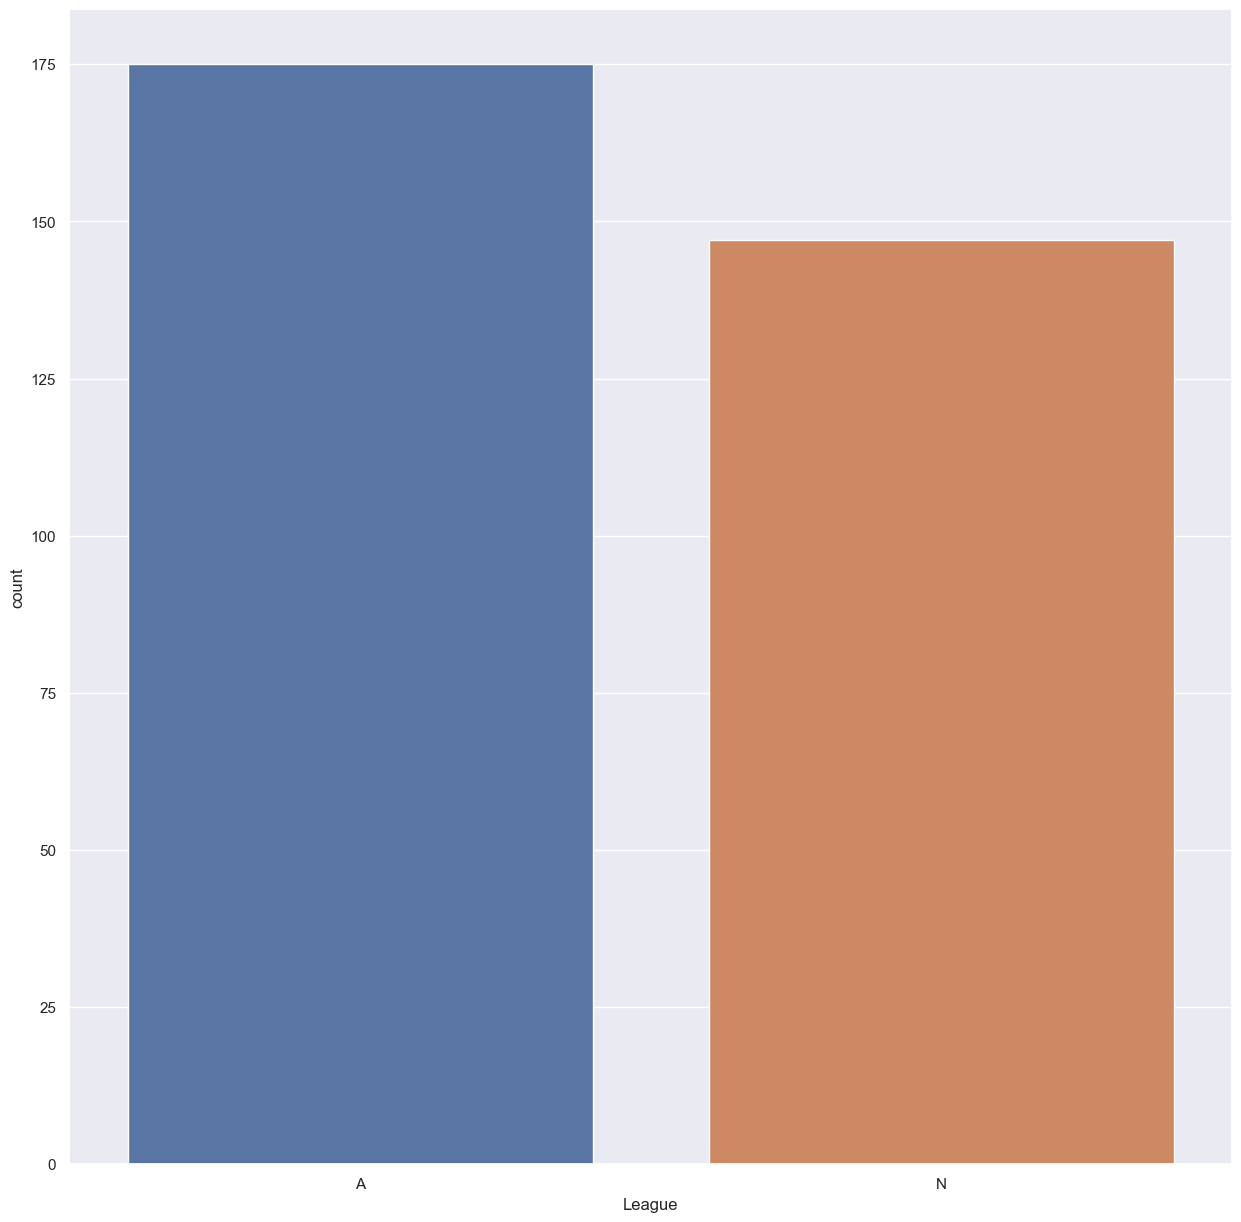

   Division  Ratio
W       165   0.51
E       157   0.49


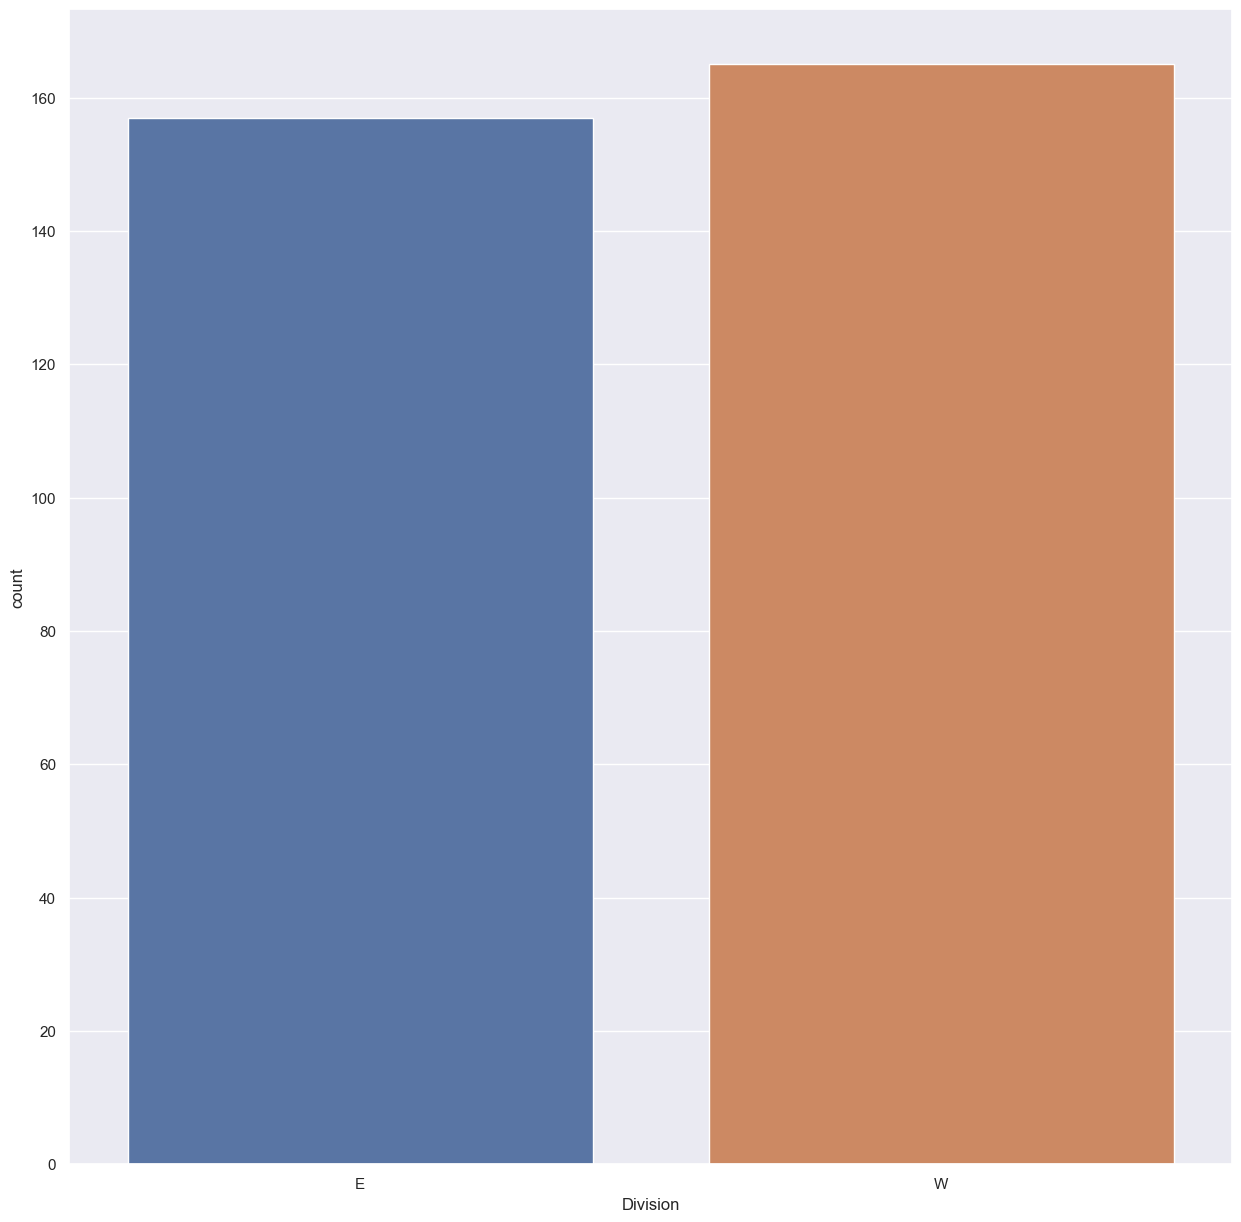

   NewLeague  Ratio
A        176   0.55
N        146   0.45


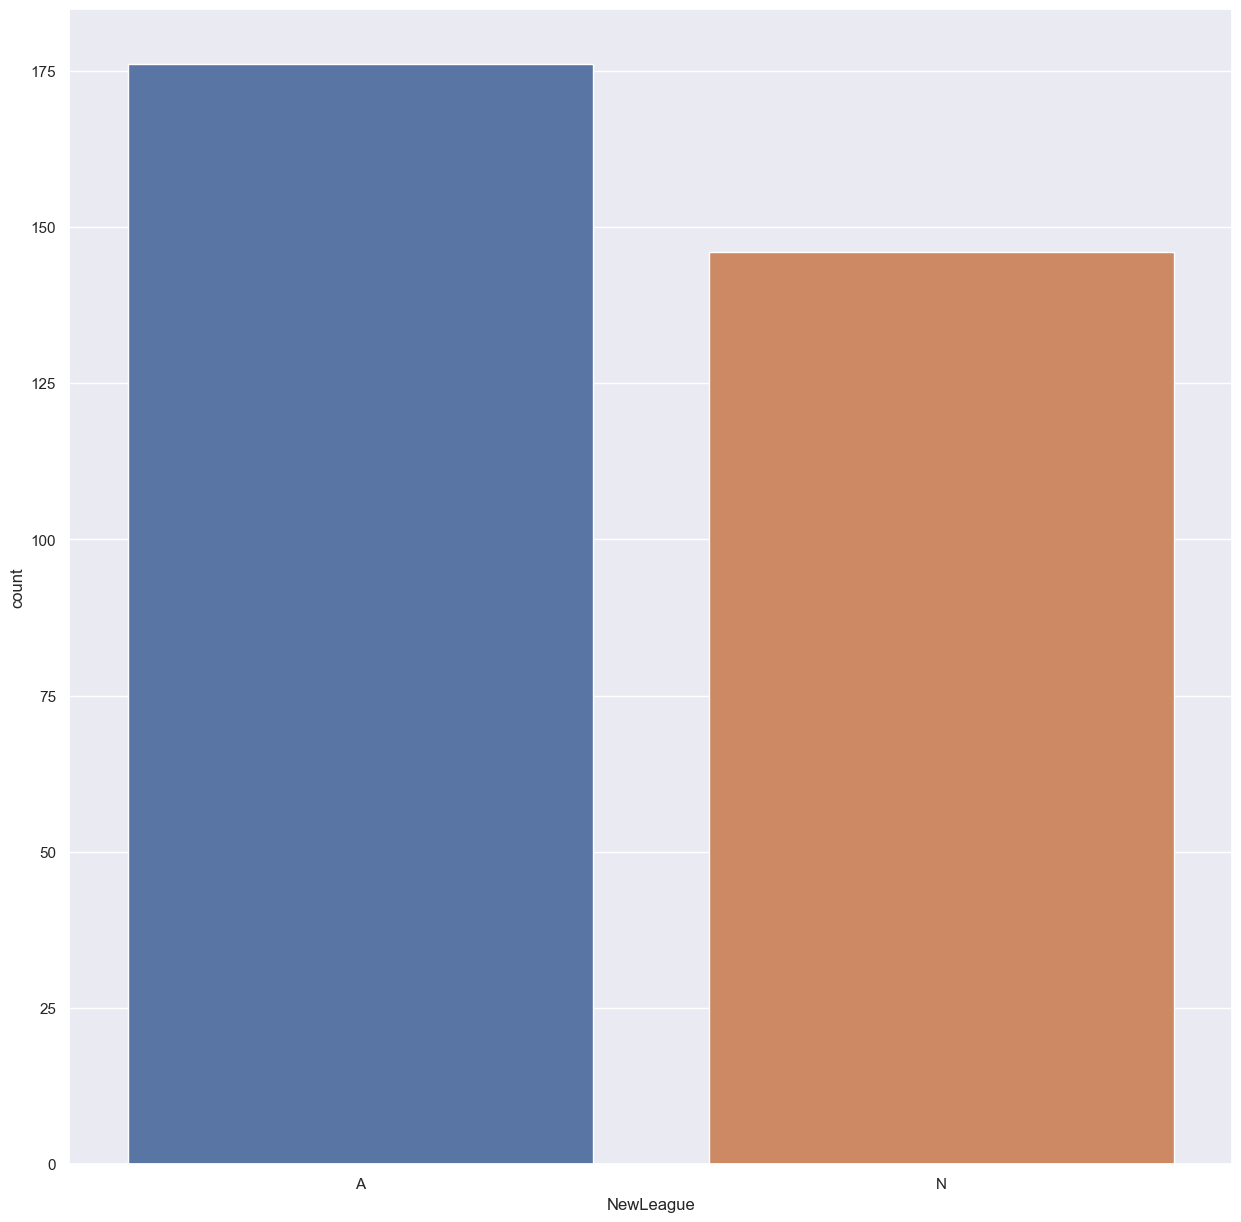

In [1213]:
for col in cat_cols:
    categorical_summary(df, col, True)

In [1214]:
def numerical_summary(dataframe, col_name, plot = False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)
    
    if plot:
        dataframe[col_name].hist(bins = 20)
        plt.title(col_name)
        plt.xlabel(col_name)
        plt.show()

count   322.00
mean    380.93
std     153.40
min      16.00
5%      161.00
10%     194.10
20%     221.80
30%     281.30
40%     321.80
50%     379.50
60%     430.20
70%     490.00
80%     535.60
90%     584.90
95%     609.90
99%     658.59
max     687.00
Name: AtBat, dtype: float64


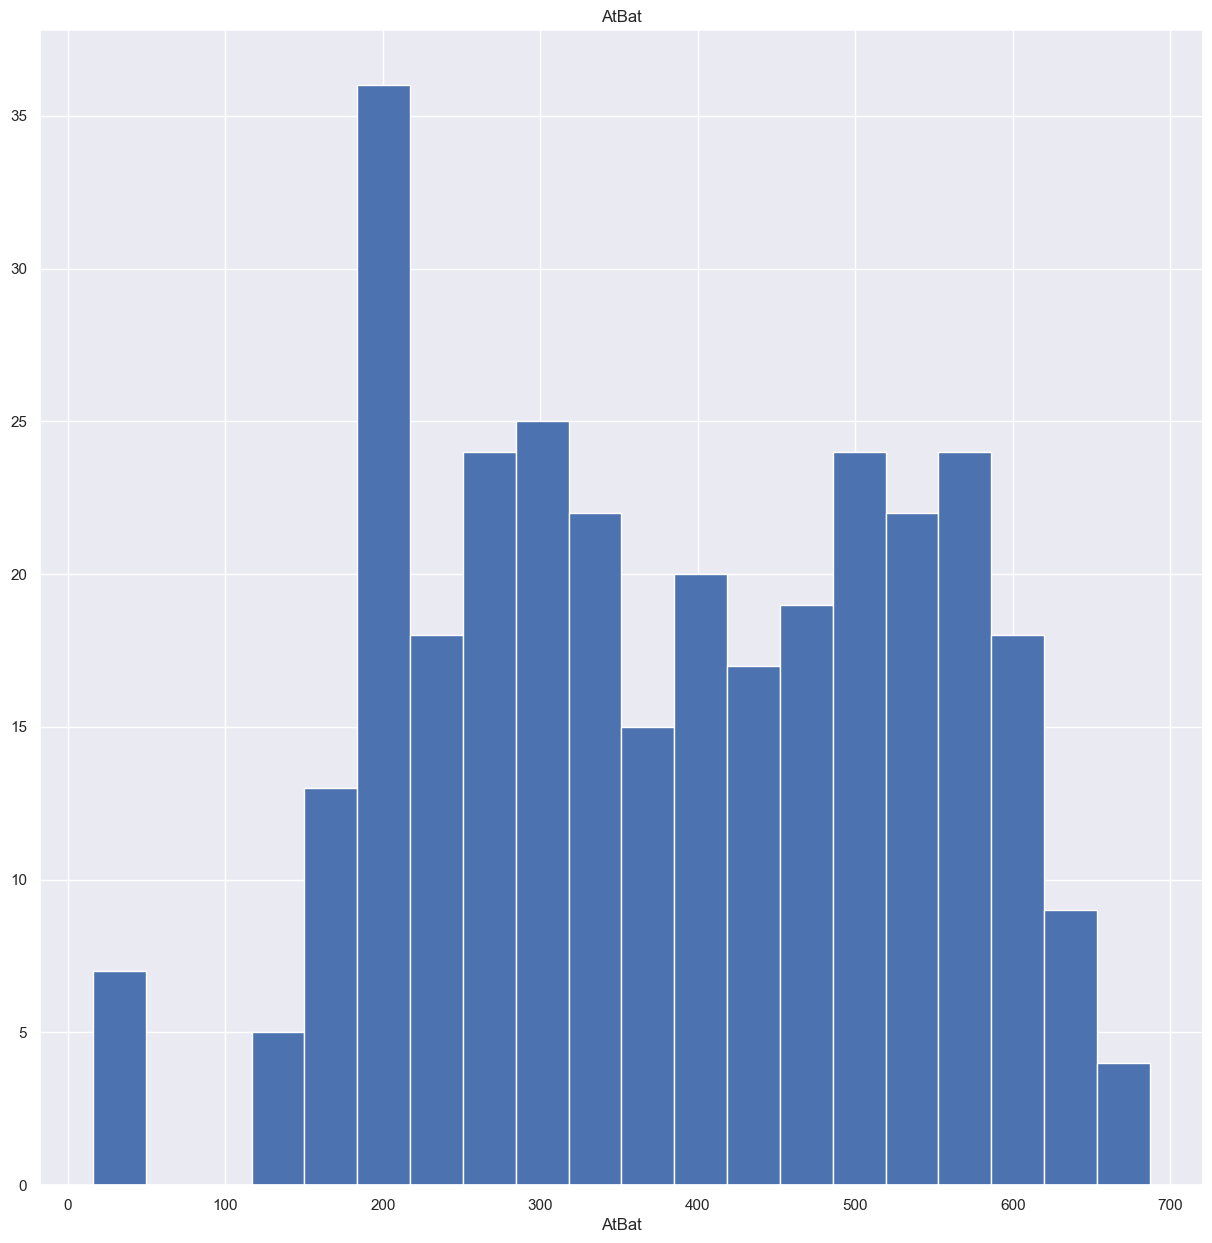

count   322.00
mean    101.02
std      46.45
min       1.00
5%       39.00
10%      45.10
20%      57.00
30%      70.00
40%      82.00
50%      96.00
60%     113.00
70%     128.70
80%     144.00
90%     163.00
95%     174.00
99%     210.79
max     238.00
Name: Hits, dtype: float64


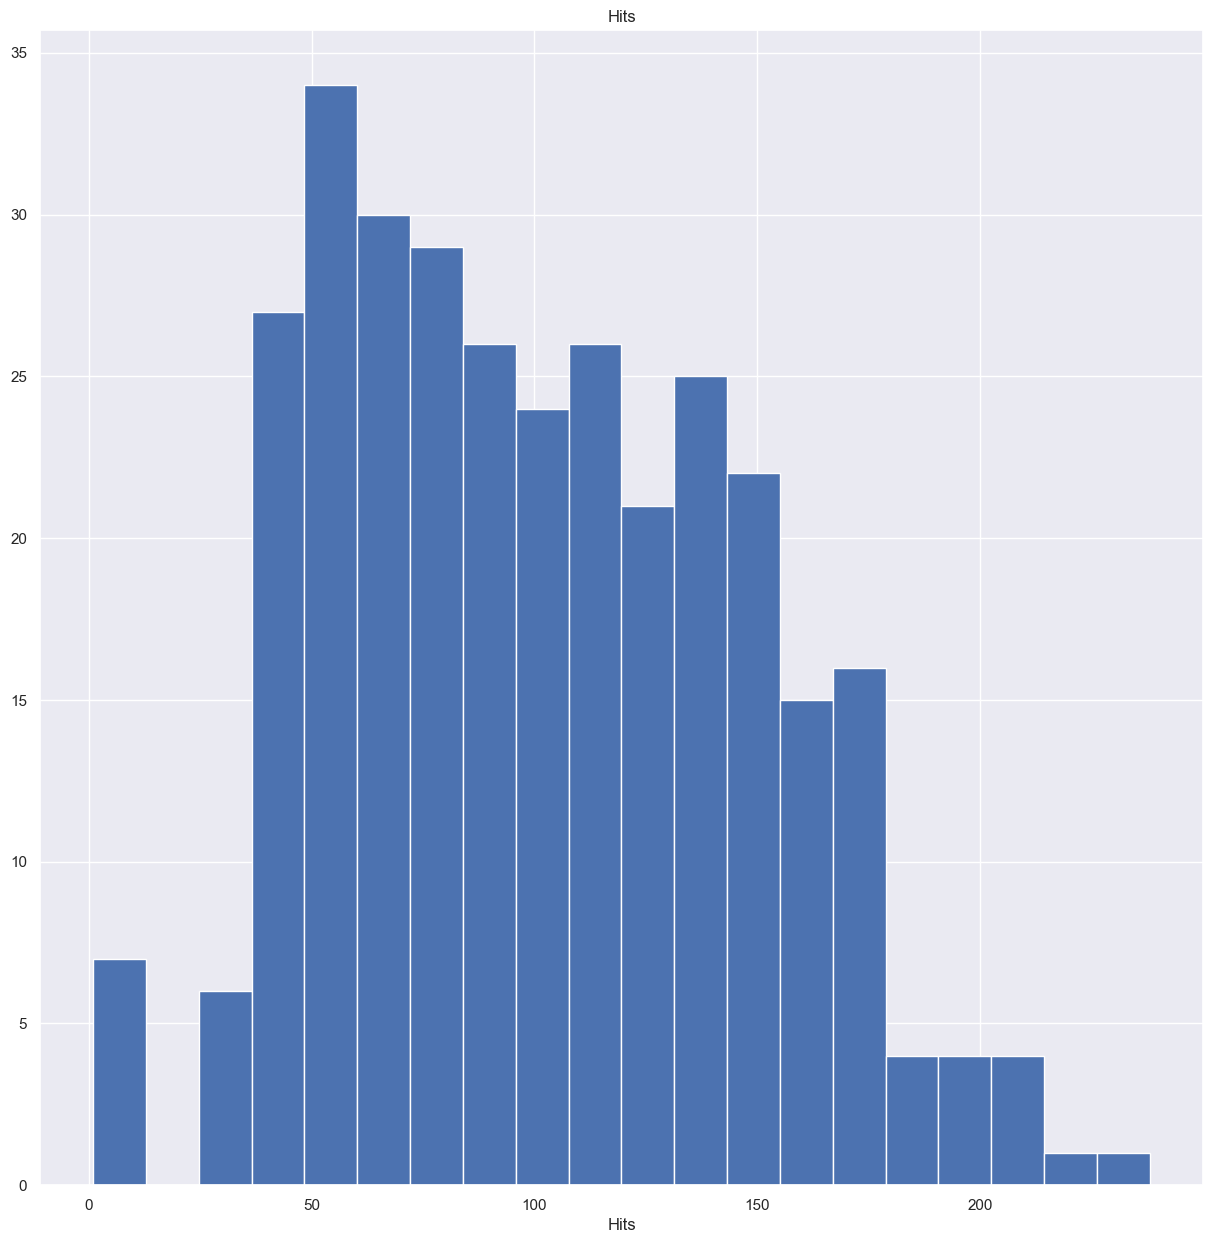

count   322.00
mean     10.77
std       8.71
min       0.00
5%        0.00
10%       1.00
20%       3.00
30%       5.00
40%       6.00
50%       8.00
60%      10.60
70%      14.00
80%      18.00
90%      24.00
95%      28.95
99%      33.00
max      40.00
Name: HmRun, dtype: float64


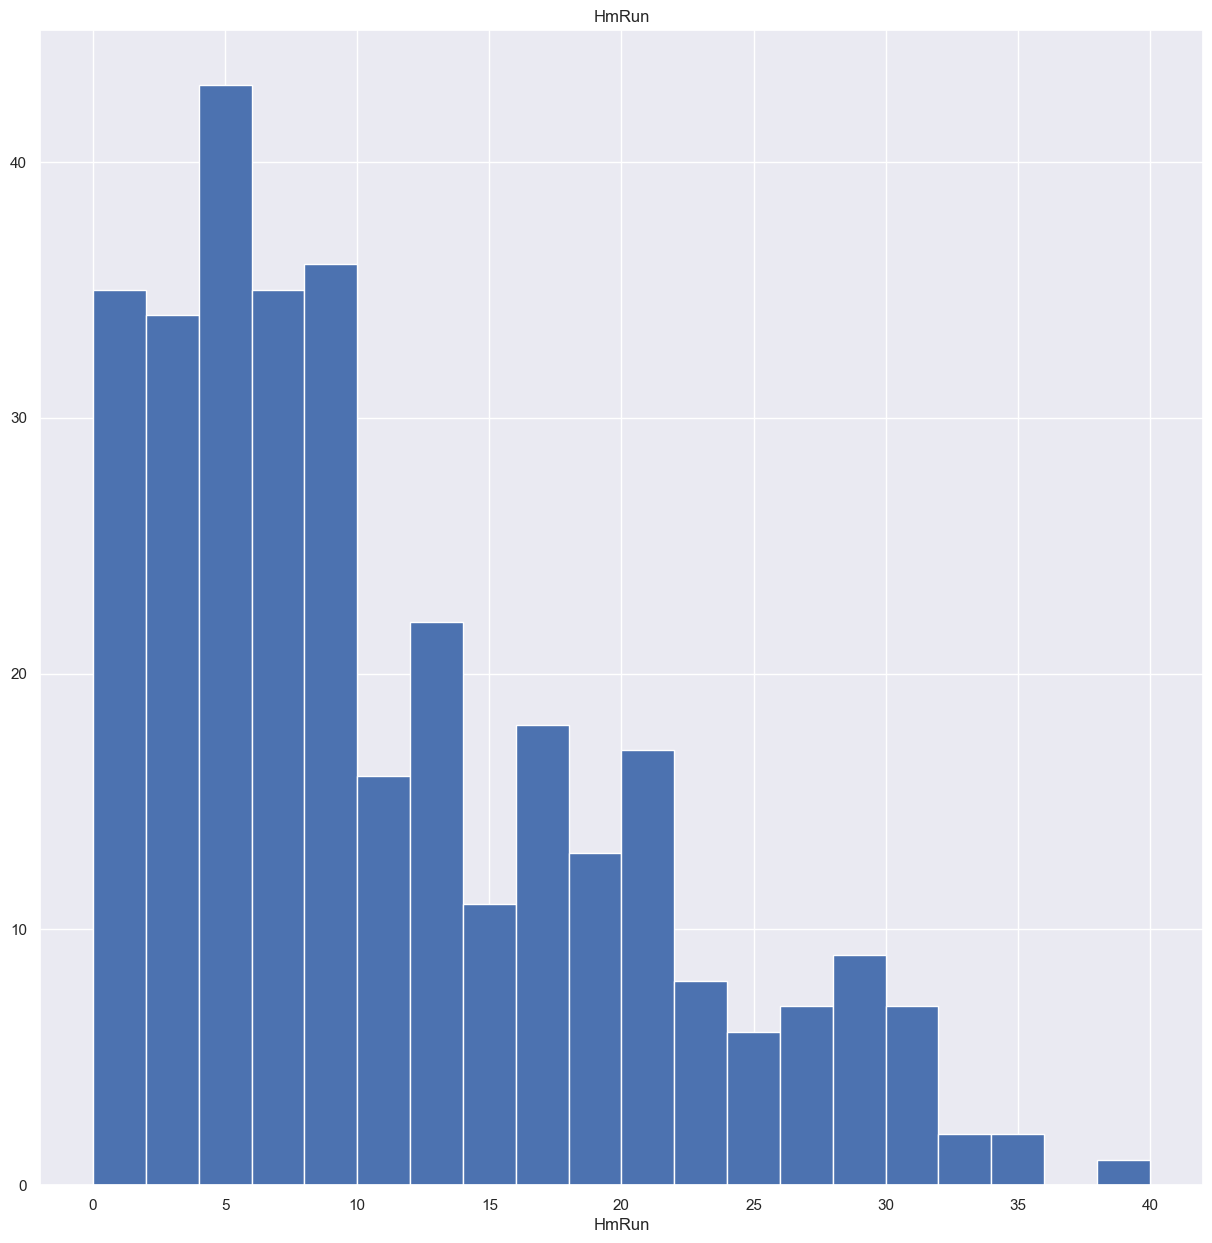

count   322.00
mean     50.91
std      26.02
min       0.00
5%       17.00
10%      20.10
20%      27.00
30%      33.00
40%      41.00
50%      48.00
60%      55.60
70%      66.00
80%      75.80
90%      89.00
95%      94.00
99%     107.79
max     130.00
Name: Runs, dtype: float64


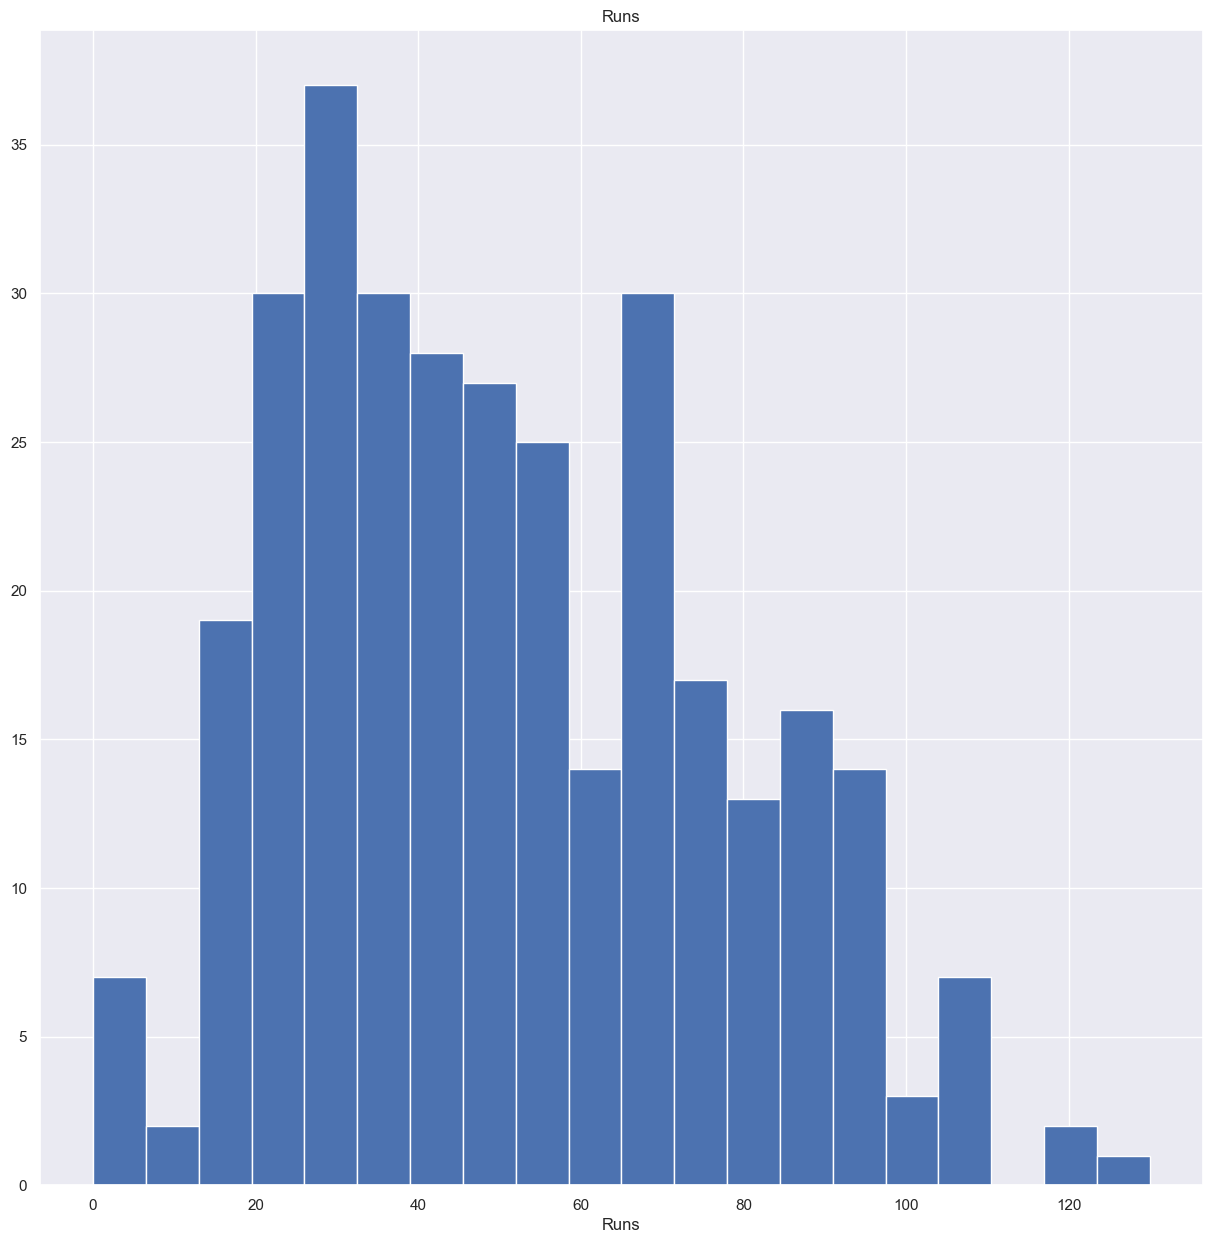

count   322.00
mean     48.03
std      26.17
min       0.00
5%       14.00
10%      19.00
20%      26.00
30%      30.00
40%      36.40
50%      44.00
60%      49.00
70%      58.00
80%      73.00
90%      86.00
95%      96.00
99%     112.37
max     121.00
Name: RBI, dtype: float64


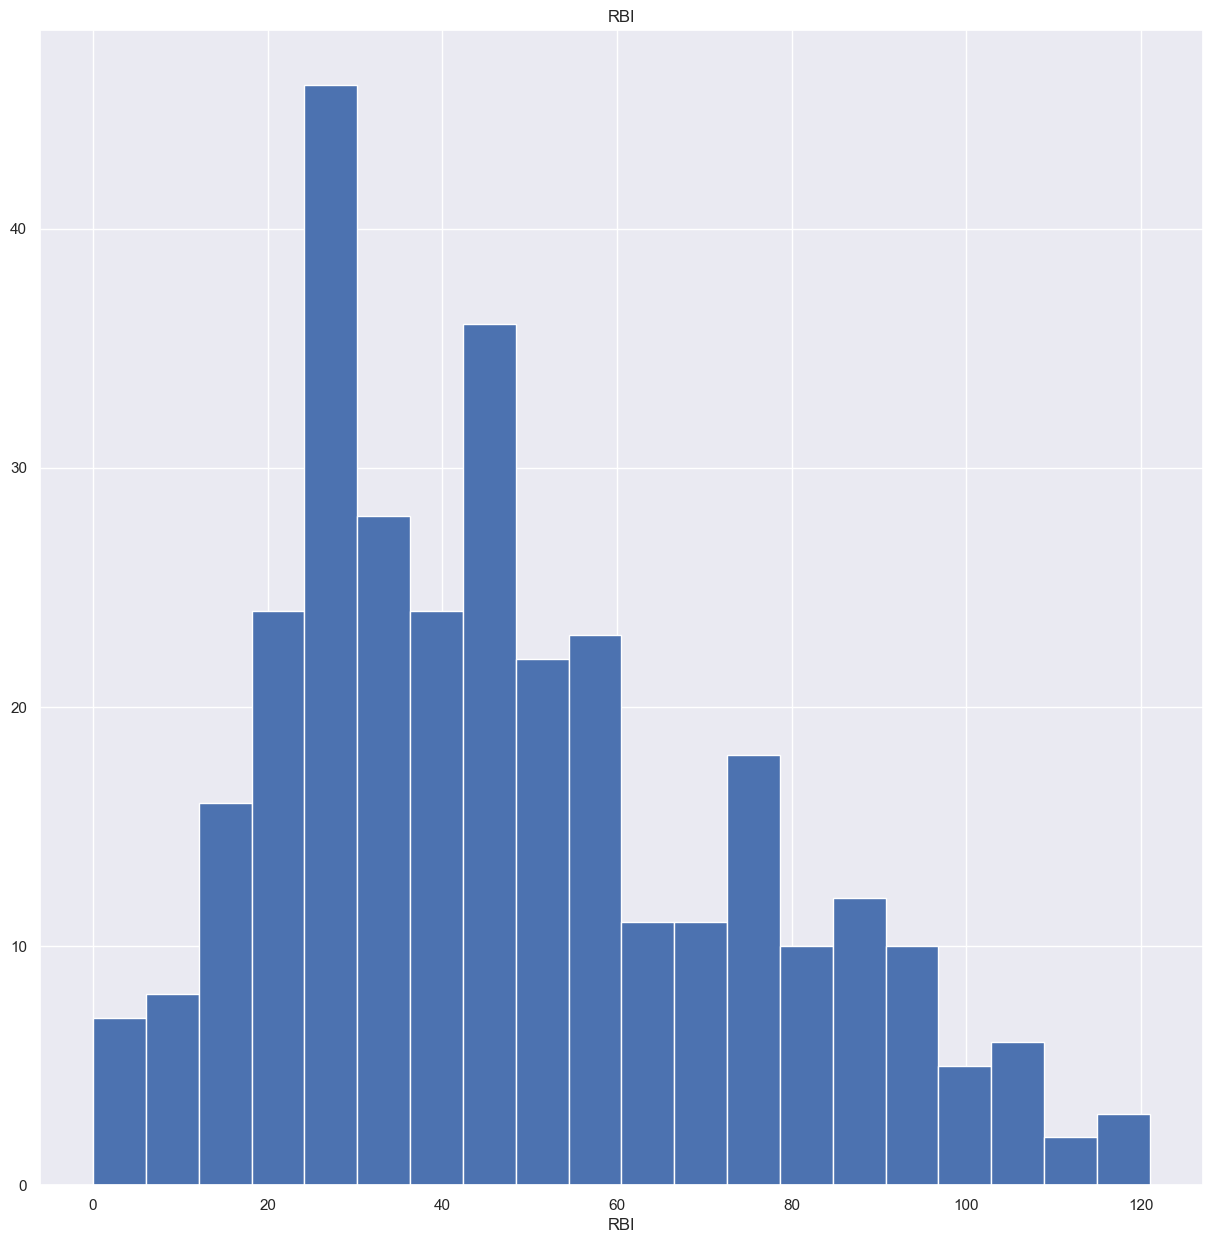

count   322.00
mean     38.74
std      21.64
min       0.00
5%       11.05
10%      15.00
20%      20.00
30%      24.00
40%      30.00
50%      35.00
60%      40.00
70%      48.70
80%      59.00
90%      69.90
95%      78.00
99%      93.58
max     105.00
Name: Walks, dtype: float64


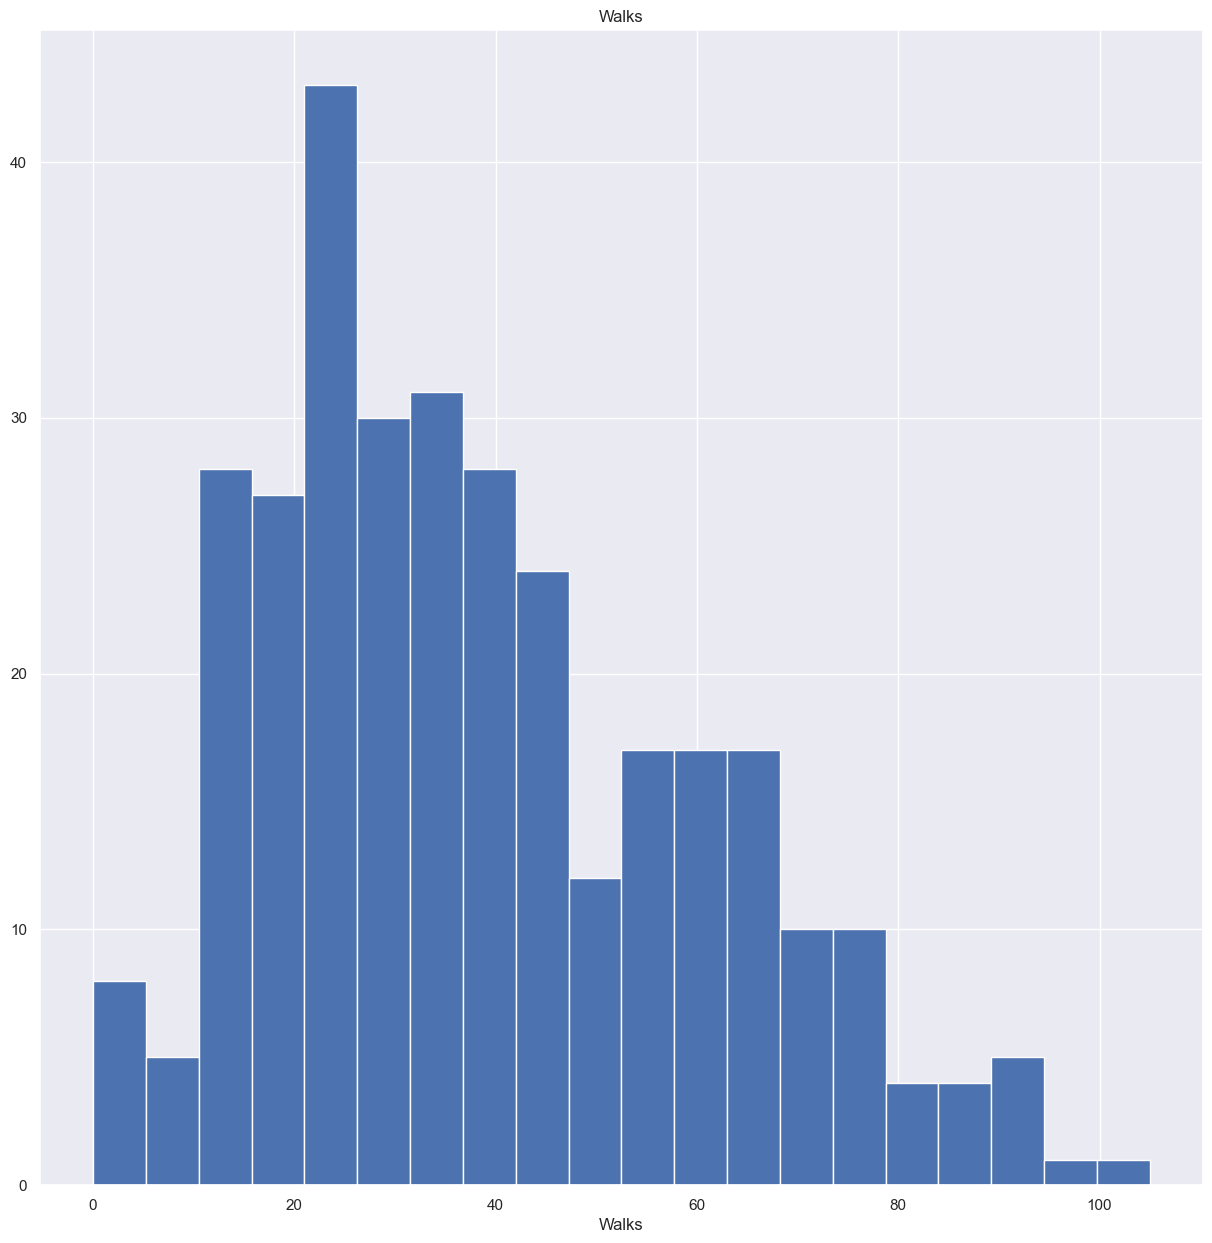

count   322.00
mean      7.44
std       4.93
min       1.00
5%        1.00
10%       2.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       7.60
70%      10.00
80%      12.00
90%      15.00
95%      17.00
99%      19.79
max      24.00
Name: Years, dtype: float64


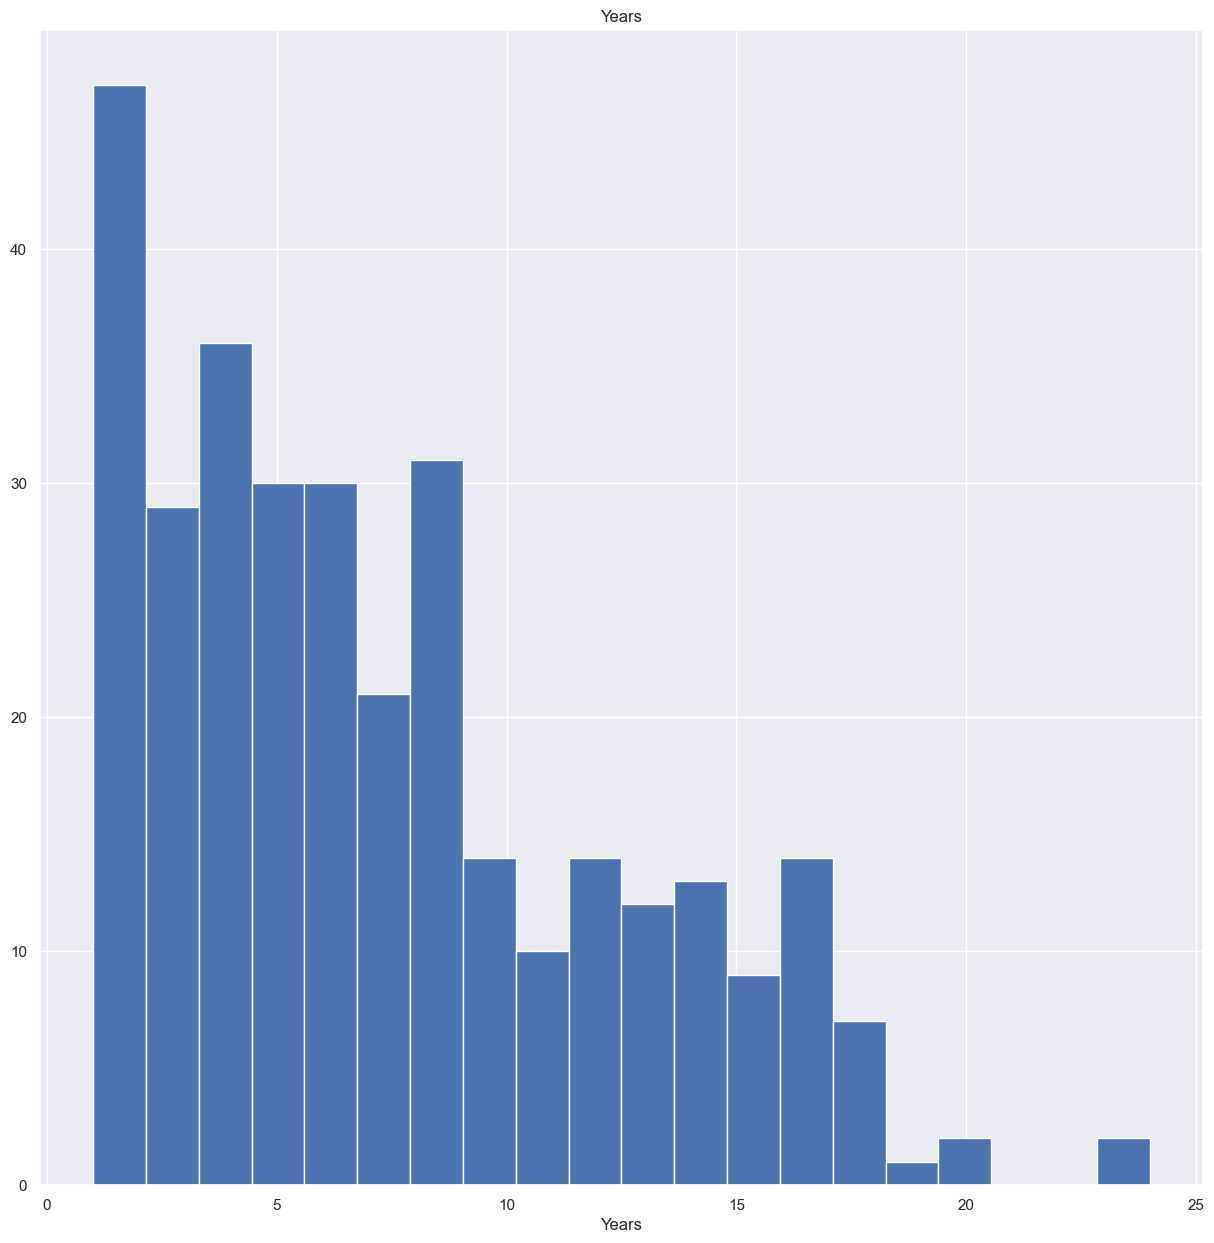

count     322.00
mean     2648.68
std      2324.21
min        19.00
5%        216.50
10%       342.20
20%       667.60
30%       963.40
40%      1402.20
50%      1928.00
60%      2654.00
70%      3365.00
80%      4483.00
90%      6123.40
95%      7125.60
99%      8749.97
max     14053.00
Name: CAtBat, dtype: float64


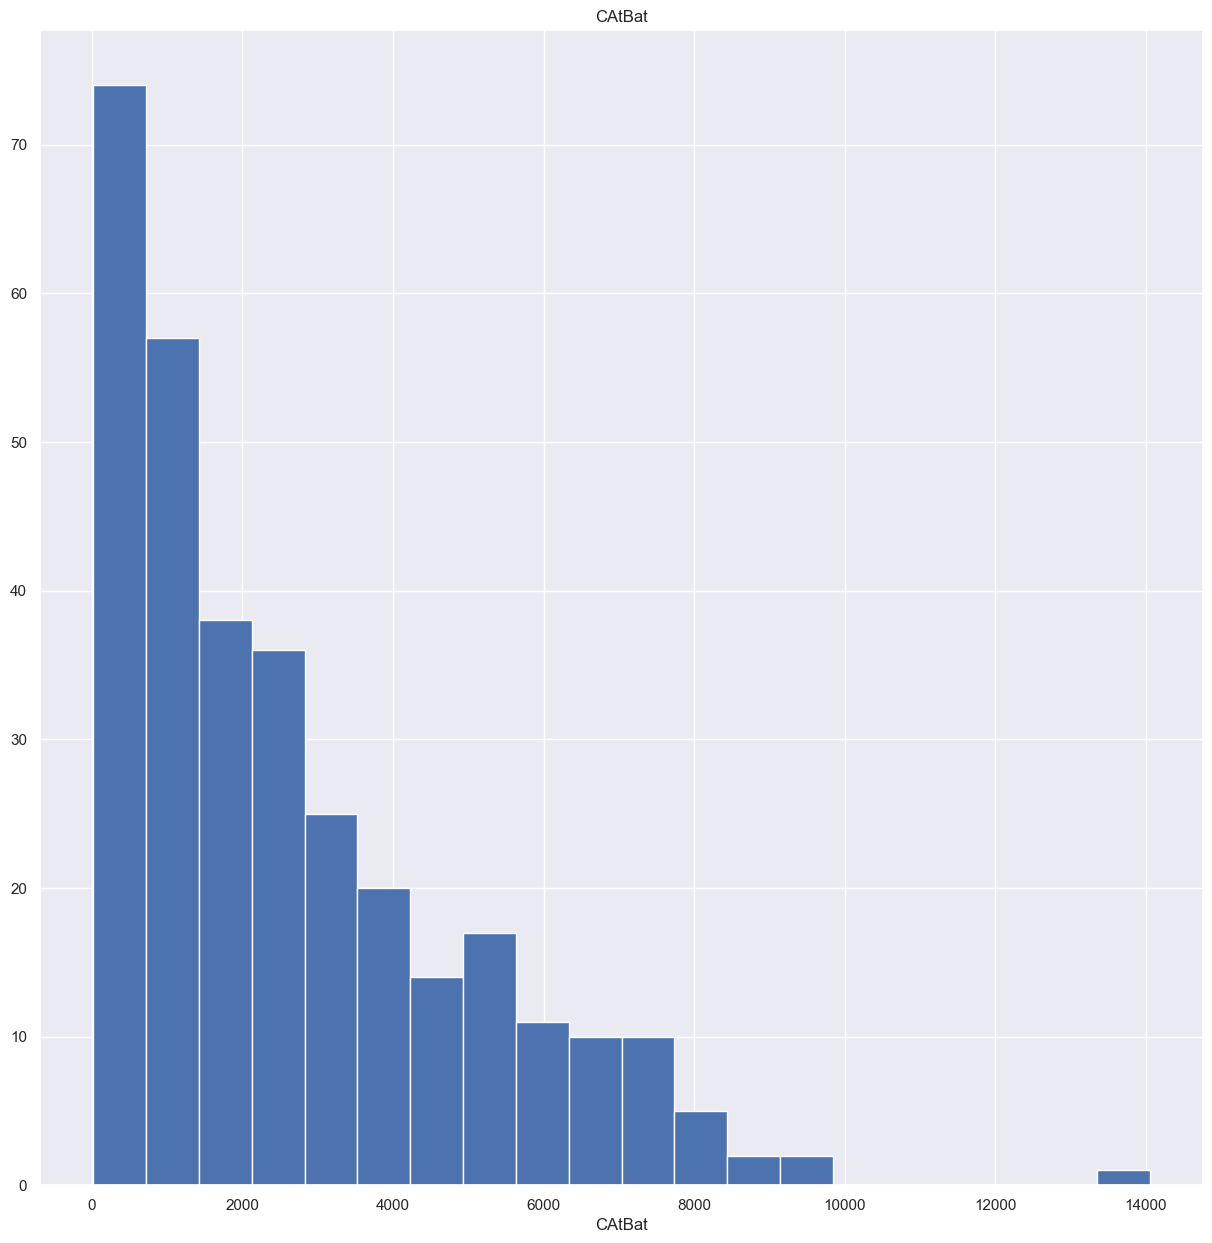

count    322.00
mean     717.57
std      654.47
min        4.00
5%        54.00
10%       86.00
20%      164.60
30%      238.00
40%      355.80
50%      508.00
60%      708.20
70%      911.10
80%     1229.20
90%     1659.60
95%     2017.15
99%     2500.34
max     4256.00
Name: CHits, dtype: float64


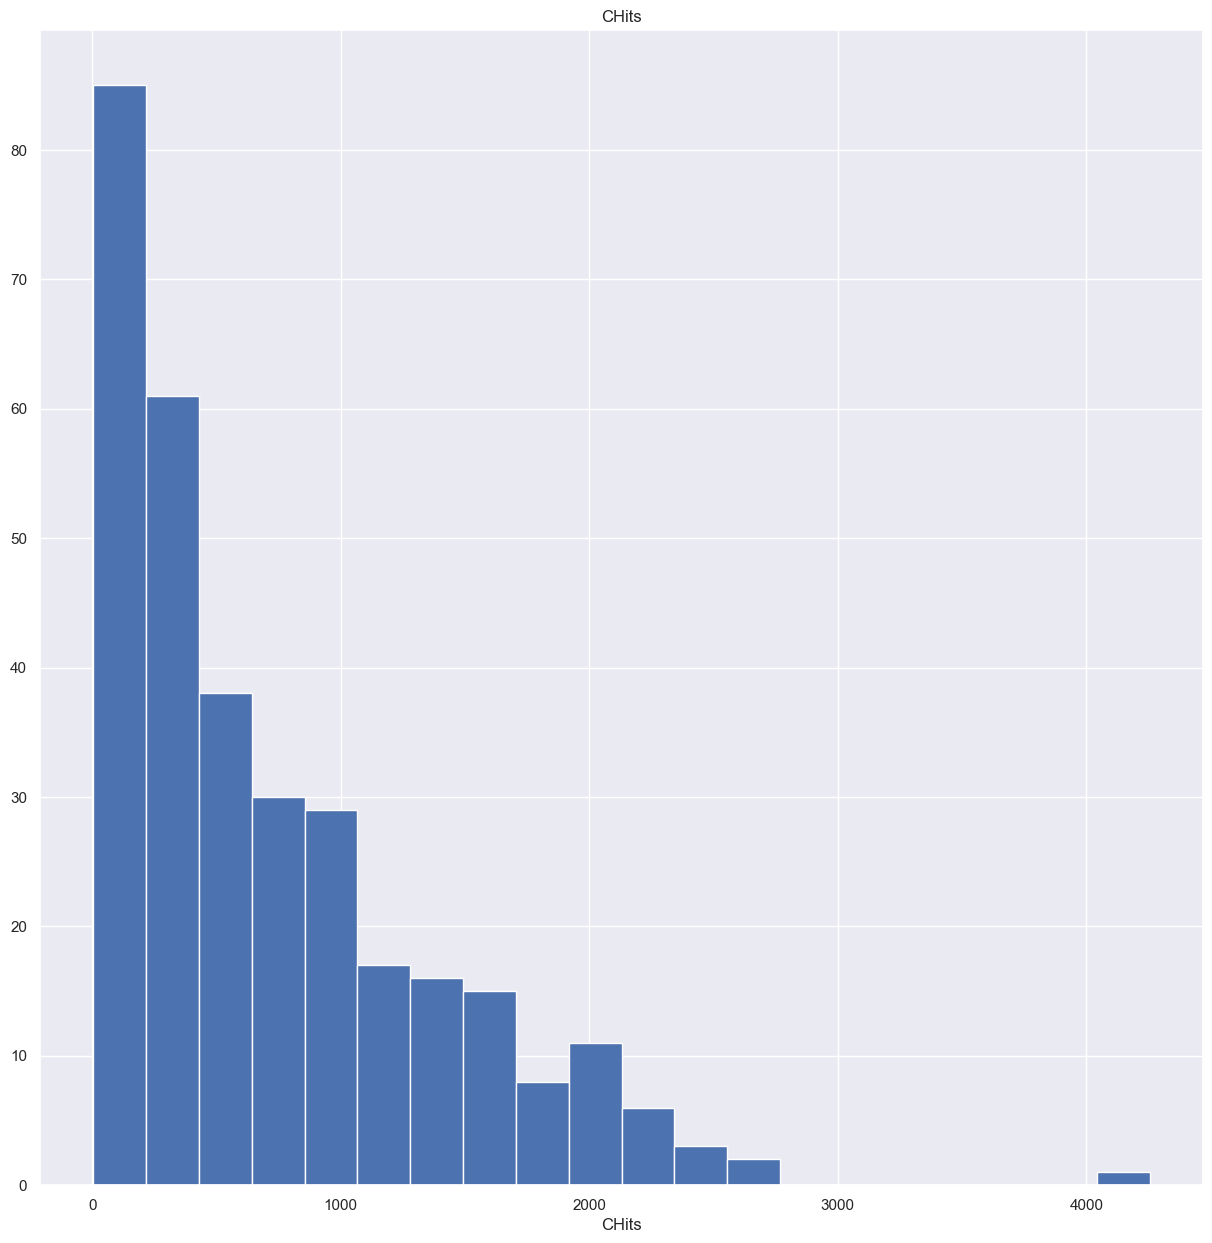

count   322.00
mean     69.49
std      86.27
min       0.00
5%        2.00
10%       4.00
20%      10.20
30%      16.30
40%      27.40
50%      37.50
60%      51.20
70%      72.40
80%     103.80
90%     194.90
95%     265.65
99%     373.12
max     548.00
Name: CHmRun, dtype: float64


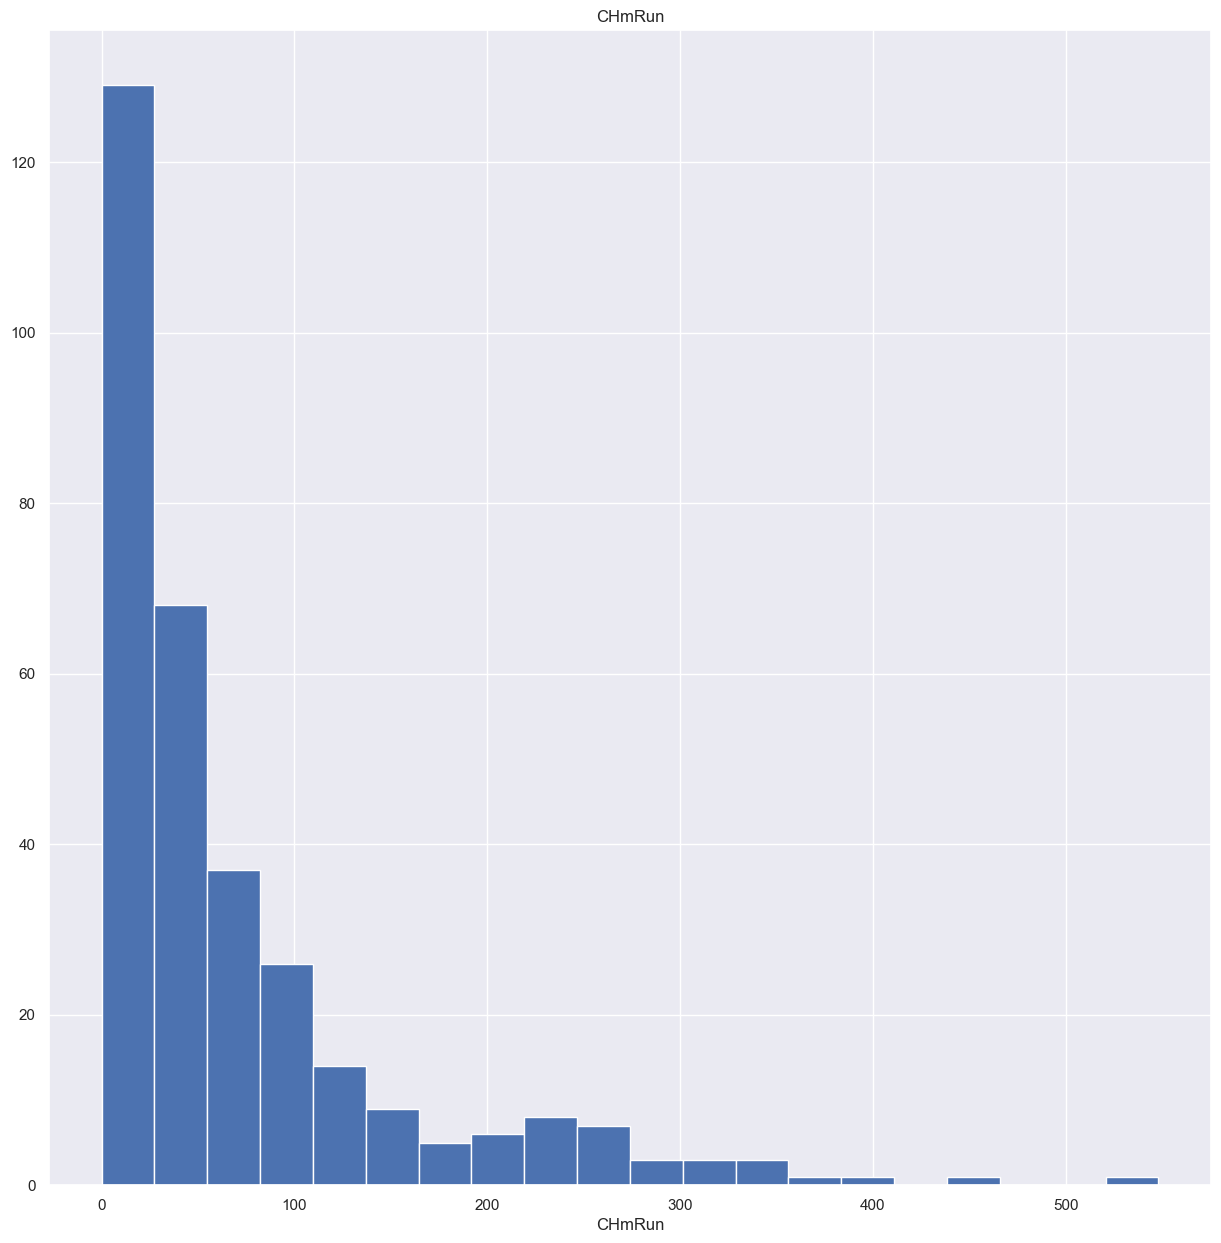

count    322.00
mean     358.80
std      334.11
min        1.00
5%        27.00
10%       38.10
20%       80.40
30%      117.30
40%      181.00
50%      247.00
60%      333.00
70%      443.40
80%      627.20
90%      895.70
95%     1032.30
99%     1174.37
max     2165.00
Name: CRuns, dtype: float64


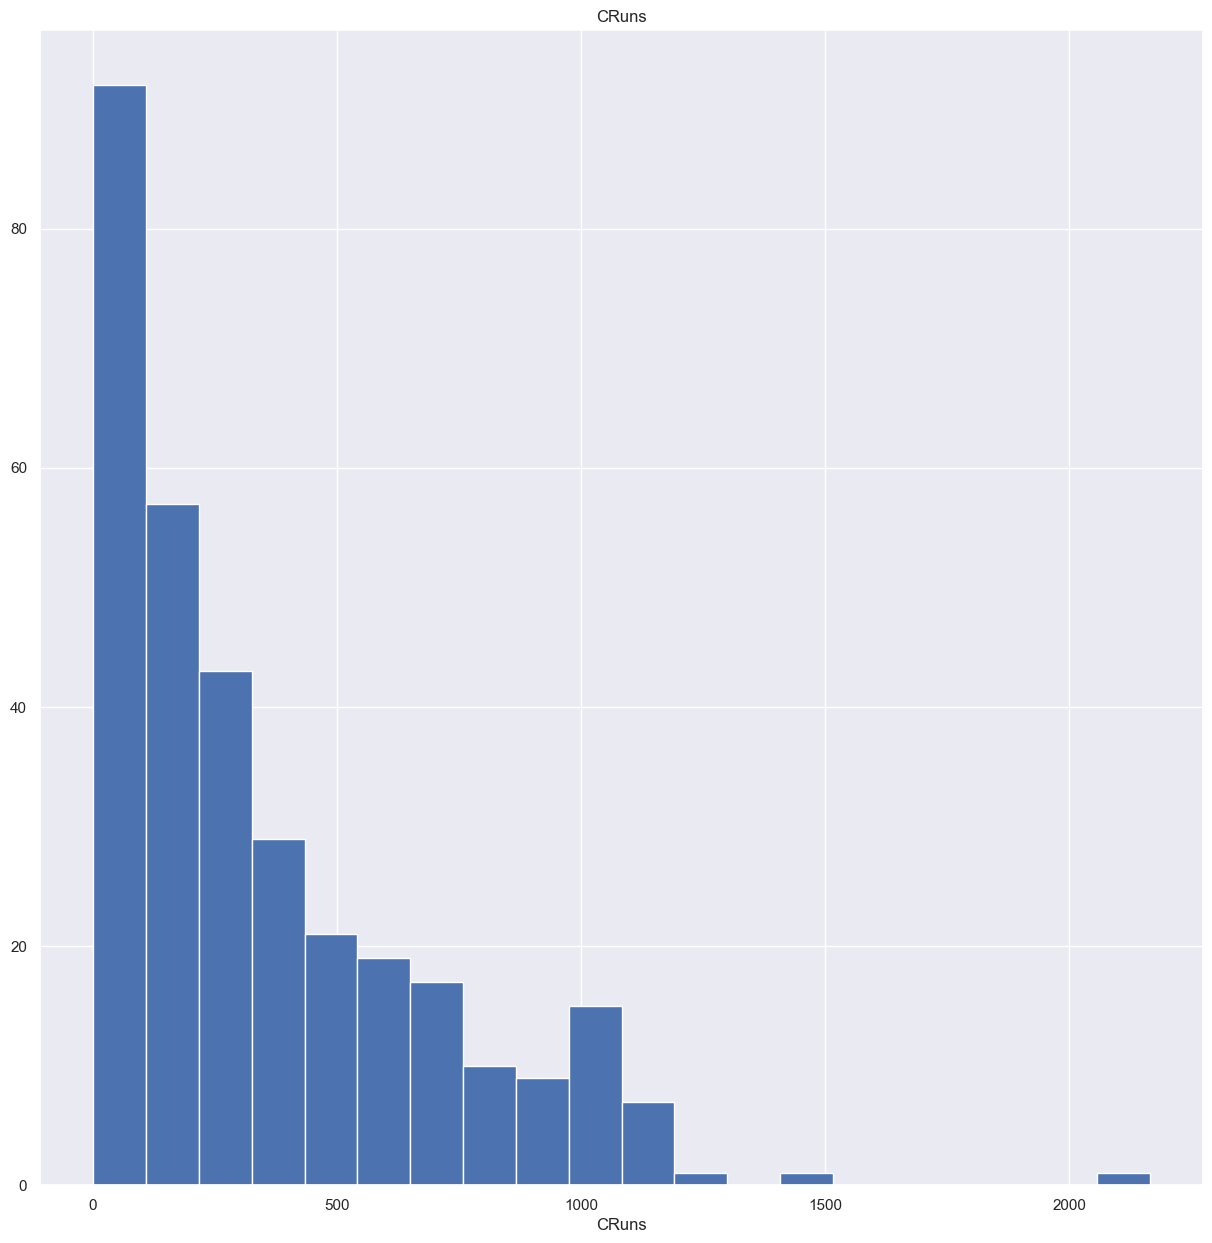

count    322.00
mean     330.12
std      333.22
min        0.00
5%        22.05
10%       34.10
20%       70.20
30%      106.30
40%      149.00
50%      220.50
60%      303.60
70%      379.10
80%      496.20
90%      861.60
95%     1071.75
99%     1310.85
max     1659.00
Name: CRBI, dtype: float64


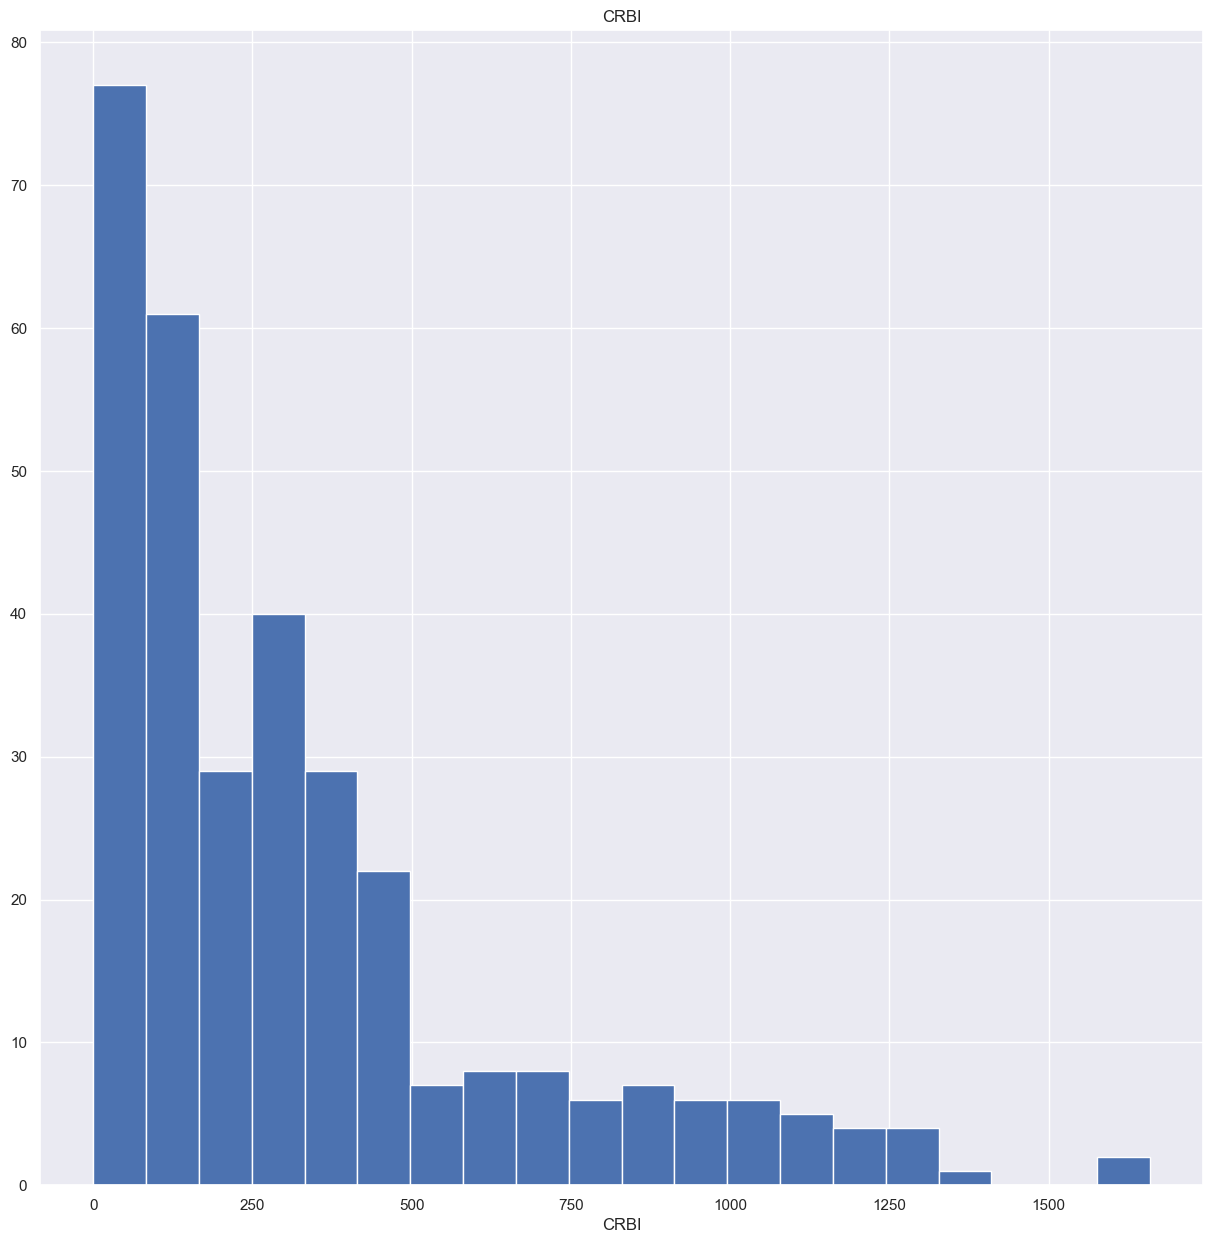

count    322.00
mean     260.24
std      267.06
min        0.00
5%        15.05
10%       30.10
20%       55.00
30%       82.00
40%      117.40
50%      170.50
60%      226.60
70%      300.70
80%      421.00
90%      643.90
95%      817.60
99%     1139.14
max     1566.00
Name: CWalks, dtype: float64


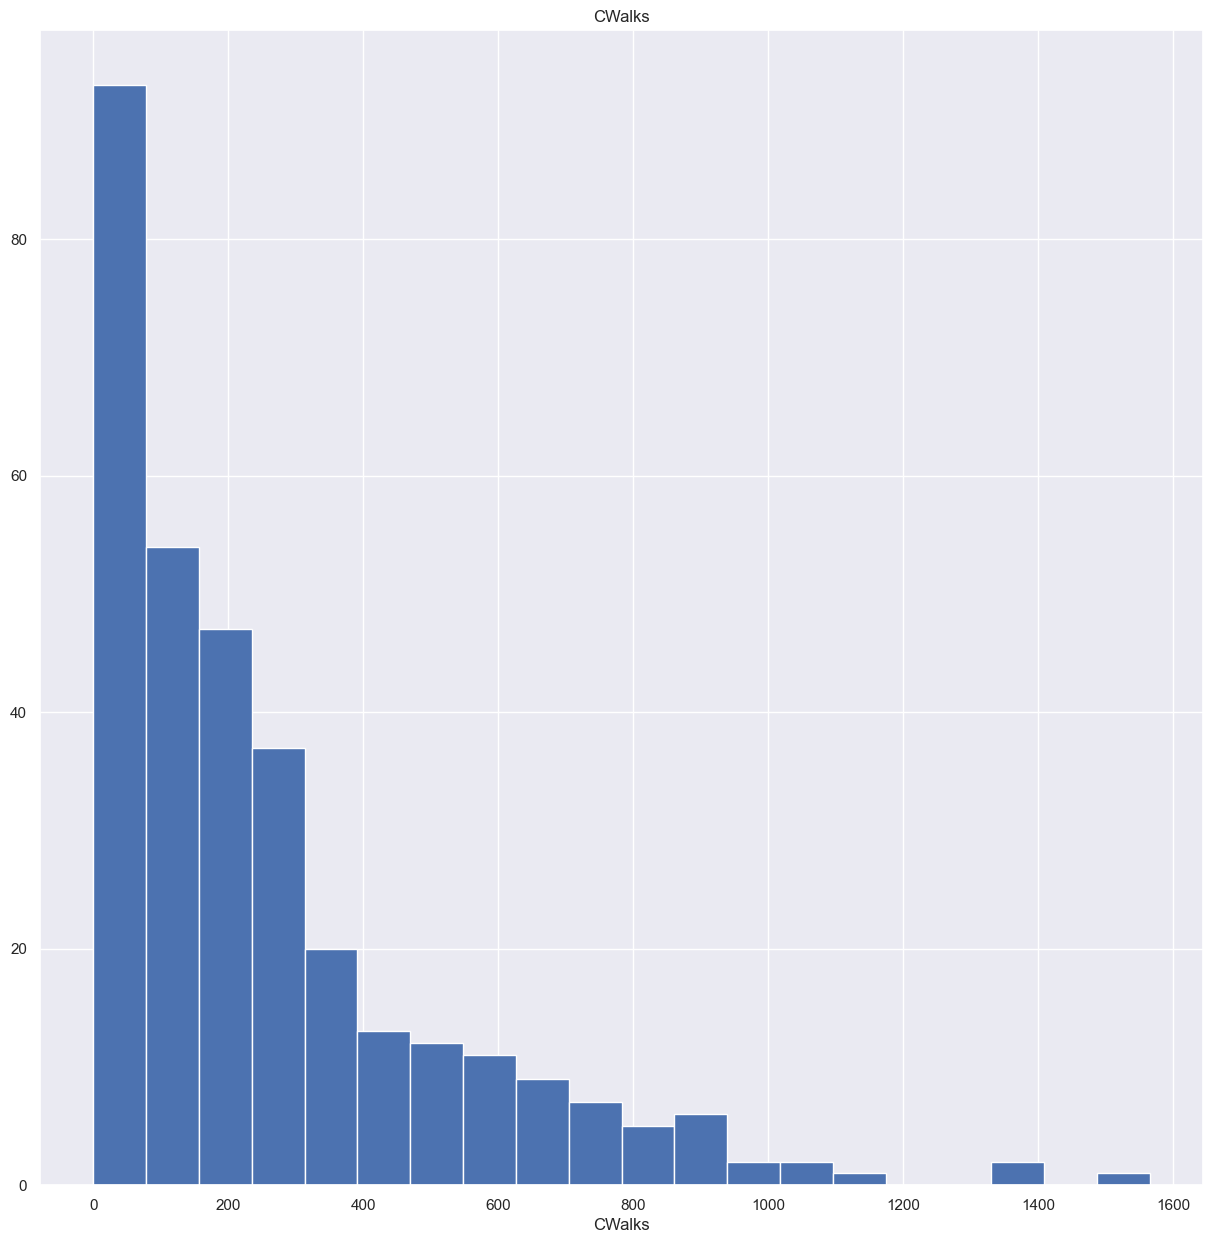

count    322.00
mean     288.94
std      280.70
min        0.00
5%        33.20
10%       62.20
20%       99.60
30%      132.00
40%      167.00
50%      212.00
60%      257.40
70%      303.00
80%      365.80
90%      685.60
95%      910.65
99%     1301.19
max     1378.00
Name: PutOuts, dtype: float64


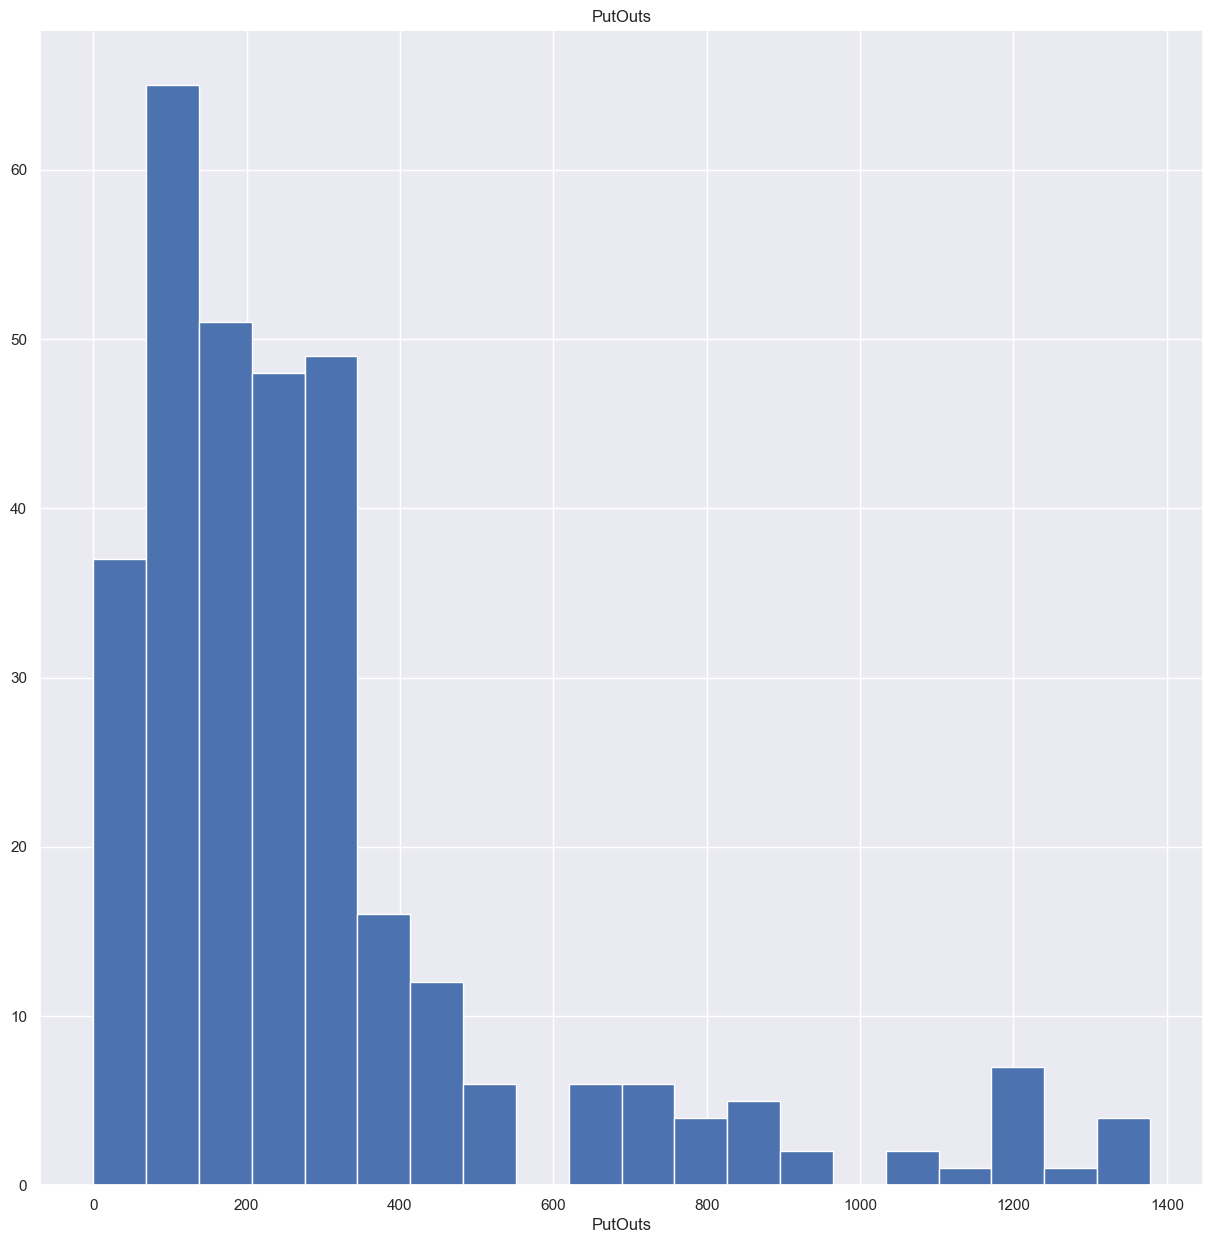

count   322.00
mean    106.91
std     136.85
min       0.00
5%        0.00
10%       2.00
20%       5.20
30%       9.00
40%      15.40
50%      39.50
60%      76.80
70%     134.80
80%     210.80
90%     353.30
95%     431.45
99%     478.16
max     492.00
Name: Assists, dtype: float64


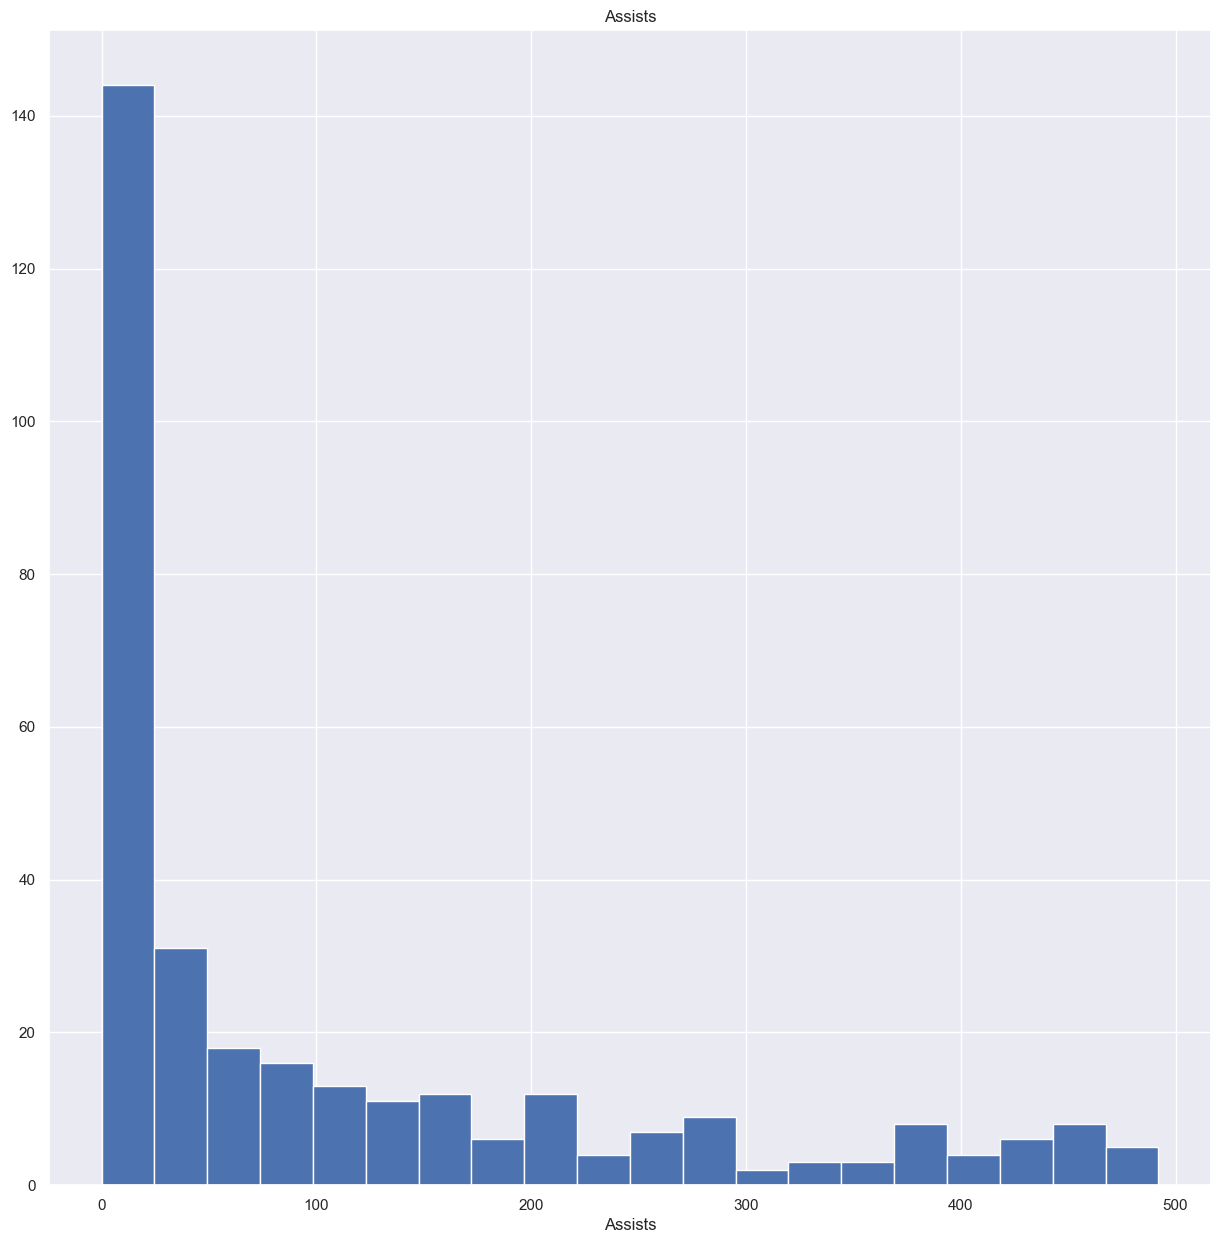

count   322.00
mean      8.04
std       6.37
min       0.00
5%        0.00
10%       1.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       8.00
70%      10.00
80%      13.00
90%      17.00
95%      20.00
99%      25.79
max      32.00
Name: Errors, dtype: float64


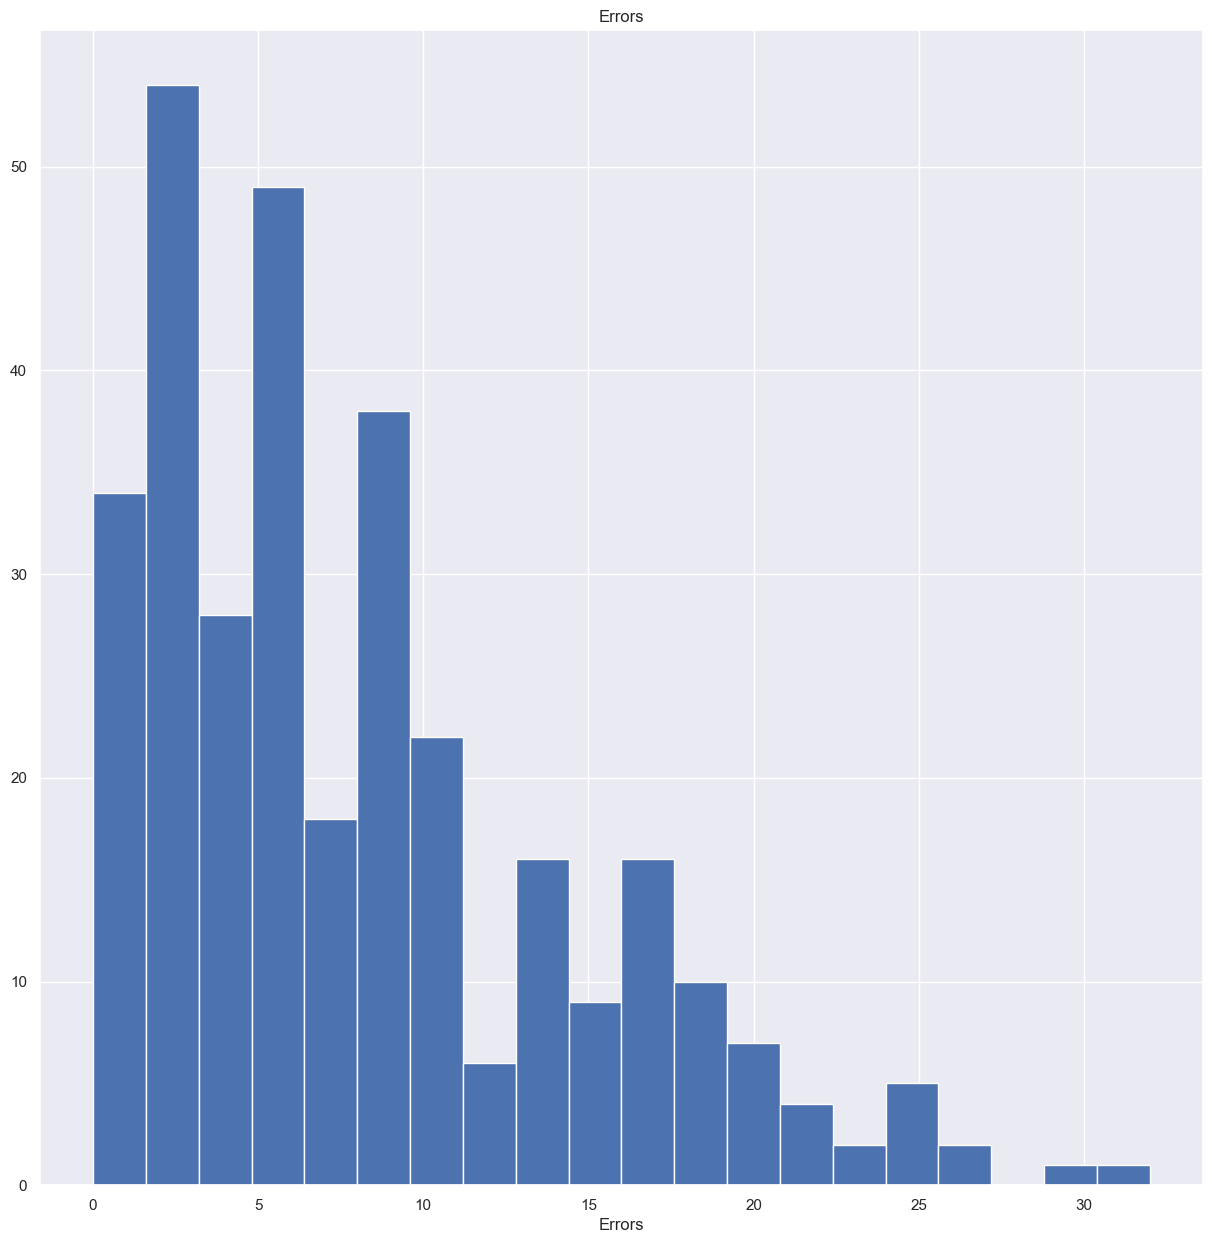

count    263.00
mean     535.93
std      451.12
min       67.50
5%        86.60
10%      100.00
20%      155.00
30%      221.00
40%      300.00
50%      425.00
60%      538.00
70%      700.00
80%      809.00
90%     1048.67
95%     1346.00
99%     2032.89
max     2460.00
Name: Salary, dtype: float64


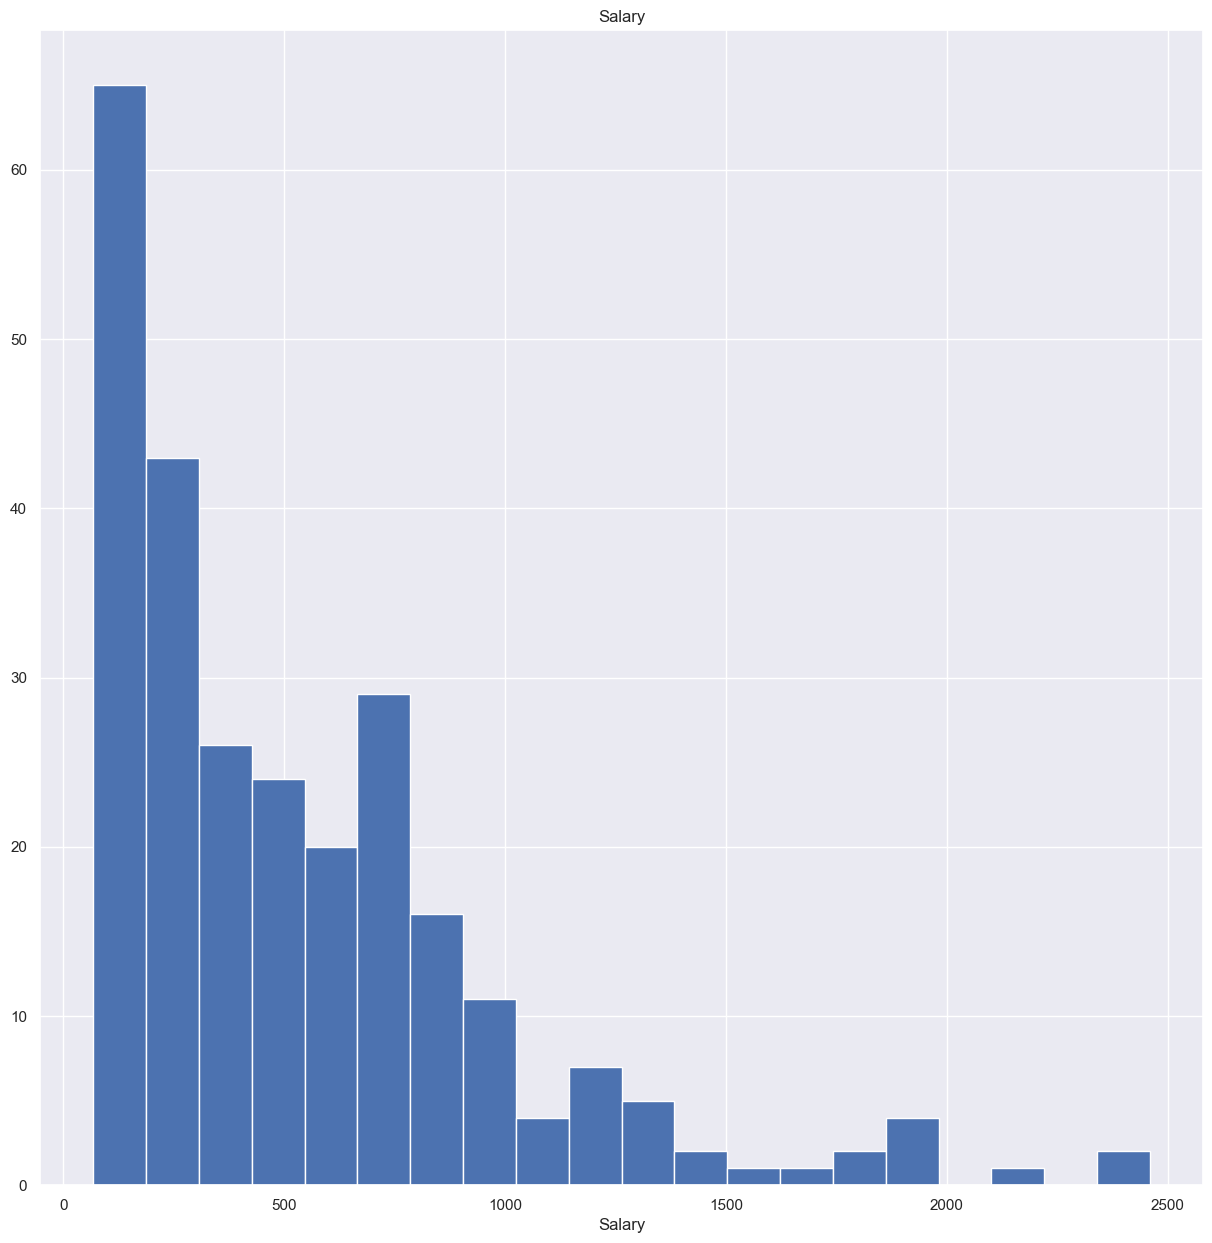

In [1215]:
for col in num_cols:
    numerical_summary(df,col,True)

## Perform target variable analysis. (The mean of the target variable according to the categorical variables,mean of numerical variables)

In [1216]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


In [1217]:
for col in cat_cols:
    target_summary_with_cat(df, "Salary", col)

        TARGET_MEAN
League             
A            542.00
N            529.12


          TARGET_MEAN
Division             
E              624.27
W              450.88


           TARGET_MEAN
NewLeague             
A               537.11
N               534.55




## Analyze outliers

In [1218]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    
    interquartile = quartile3 - quartile1
    up = quartile3 + 1.5 * interquartile 
    low = quartile1 - 1.5 * interquartile
    return low, up

In [1219]:
outlier_thresholds(df, "AtBat")

(-129.875, 897.125)

In [1220]:
def check_outlier(dataframe, col_name):
    low, up = outlier_thresholds(dataframe, col_name,0.1,0.9)
    
    if dataframe[(dataframe[col_name] > up) | (dataframe[col_name] < low)].any(axis= None):
        return True
    else:
        return False

In [1221]:
for col in num_cols:
    print(col, check_outlier(df,col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits True
CHmRun True
CRuns False
CRBI False
CWalks True
PutOuts False
Assists False
Errors False
Salary False


In [1222]:
def replace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [1223]:
for col in num_cols:
    if check_outlier(df,col):
        replace_with_thresholds(df,col,0.1,0.9)

In [1224]:
for col in num_cols:
    print(col, check_outlier(df,col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


## Perform missing observation analysis.

In [1225]:
df.isnull().values.any()

True

In [1226]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [1227]:
df.isnull().sum().sum()

59

In [1228]:
df.notnull().sum()

AtBat        322
Hits         322
HmRun        322
Runs         322
RBI          322
Walks        322
Years        322
CAtBat       322
CHits        322
CHmRun       322
CRuns        322
CRBI         322
CWalks       322
League       322
Division     322
PutOuts      322
Assists      322
Errors       322
Salary       263
NewLeague    322
dtype: int64

In [1229]:
df[df.isnull().any(axis = 1)]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66.00,1.00,30,29,14.00,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42.00,3.00,20,16,11.00,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478.00,100.00,643,658,653.00,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26.00,2.00,9,9,3.00,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833.00,224.00,1033,864,1087.00,A,W,127,221,7,NaN,A
32,517,141,27,70,87,52,9,3571,994.00,215.00,545,652,337.00,N,W,1378,102,8,NaN,N
36,161,36,0,19,10,17,4,1053,244.00,3.00,156,86,107.00,A,E,70,149,12,NaN,A
38,346,98,5,31,53,30,16,5913,1615.00,235.00,784,901,560.00,A,E,0,0,0,NaN,A
39,241,61,1,34,12,14,1,241,61.00,1.00,34,12,14.00,N,W,166,172,10,NaN,N
41,216,54,0,21,18,15,18,7318,1926.00,46.00,796,627,483.00,N,W,103,84,5,NaN,N


In [1230]:
df[df.notnull().any(axis = 1)]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66.00,1.00,30,29,14.00,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835.00,69.00,321,414,375.00,N,W,632,43,10,475.00,N
2,479,130,18,66,72,76,3,1624,457.00,63.00,224,266,263.00,A,W,880,82,14,480.00,A
3,496,141,20,65,78,37,11,5628,1575.00,225.00,828,838,354.00,N,E,200,11,3,500.00,N
4,321,87,10,39,42,30,2,396,101.00,12.00,48,46,33.00,N,E,805,40,4,91.50,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806.00,32.00,379,311,138.00,N,E,325,9,3,700.00,N
318,492,136,5,76,50,94,12,5511,1511.00,39.00,897,451,875.00,A,E,313,381,20,875.00,A
319,475,126,3,61,43,52,6,1700,433.00,7.00,217,93,146.00,A,W,37,113,7,385.00,A
320,573,144,9,85,60,78,8,3198,857.00,97.00,470,420,332.00,A,E,1314,131,12,960.00,A


In [1231]:
df.isnull().sum().sort_values(ascending=False)

Salary       59
AtBat         0
Hits          0
Errors        0
Assists       0
PutOuts       0
Division      0
League        0
CWalks        0
CRBI          0
CRuns         0
CHmRun        0
CHits         0
CAtBat        0
Years         0
Walks         0
RBI           0
Runs          0
HmRun         0
NewLeague     0
dtype: int64

In [1232]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

Salary      18.32
AtBat        0.00
Hits         0.00
Errors       0.00
Assists      0.00
PutOuts      0.00
Division     0.00
League       0.00
CWalks       0.00
CRBI         0.00
CRuns        0.00
CHmRun       0.00
CHits        0.00
CAtBat       0.00
Years        0.00
Walks        0.00
RBI          0.00
Runs         0.00
HmRun        0.00
NewLeague    0.00
dtype: float64

In [1233]:
na_cols = [col for col in df.columns if df[col].isnull().sum()> 0]

In [1234]:
na_cols

['Salary']

In [1235]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    
    missing_df = pd.concat([n_miss,ratio], axis = 1, keys = ["n_miss","ratio"])
    print(missing_df, end="\n")
    
    if na_name:
        return na_columns

In [1236]:
missing_values_table(df)

        n_miss  ratio
Salary      59  18.32


In [1237]:
missing_values_table(df,True)

        n_miss  ratio
Salary      59  18.32


['Salary']

In [1238]:
df.dropna(inplace = True)

In [1239]:
missing_values_table(df,True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

In [1240]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.00,0.96,0.56,0.90,0.80,0.62,0.01,0.21,0.23,0.22,0.24,0.22,0.13,0.31,0.34,0.33,0.39
Hits,0.96,1.00,0.53,0.91,0.79,0.59,0.02,0.21,0.24,0.19,0.24,0.22,0.12,0.30,0.30,0.28,0.44
HmRun,0.56,0.53,1.00,0.63,0.85,0.44,0.11,0.22,0.22,0.50,0.26,0.35,0.23,0.25,-0.16,-0.01,0.34
Runs,0.90,0.91,0.63,1.00,0.78,0.70,-0.01,0.17,0.19,0.23,0.24,0.20,0.16,0.27,0.18,0.19,0.42
RBI,0.80,0.79,0.85,0.78,1.00,0.57,0.13,0.28,0.30,0.45,0.31,0.39,0.23,0.31,0.06,0.15,0.45
Walks,0.62,0.59,0.44,0.70,0.57,1.00,0.13,0.27,0.27,0.35,0.33,0.31,0.43,0.28,0.10,0.08,0.44
Years,0.01,0.02,0.11,-0.01,0.13,0.13,1.00,0.92,0.90,0.73,0.88,0.86,0.84,-0.02,-0.09,-0.16,0.40
CAtBat,0.21,0.21,0.22,0.17,0.28,0.27,0.92,1.00,1.00,0.81,0.98,0.95,0.91,0.05,-0.01,-0.07,0.53
CHits,0.23,0.24,0.22,0.19,0.30,0.27,0.90,1.00,1.00,0.80,0.98,0.95,0.89,0.07,-0.01,-0.07,0.55
CHmRun,0.22,0.19,0.50,0.23,0.45,0.35,0.73,0.81,0.80,1.00,0.83,0.93,0.81,0.10,-0.19,-0.16,0.53


In [1241]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu", annot=True)
        plt.show(block=True)
    return drop_list

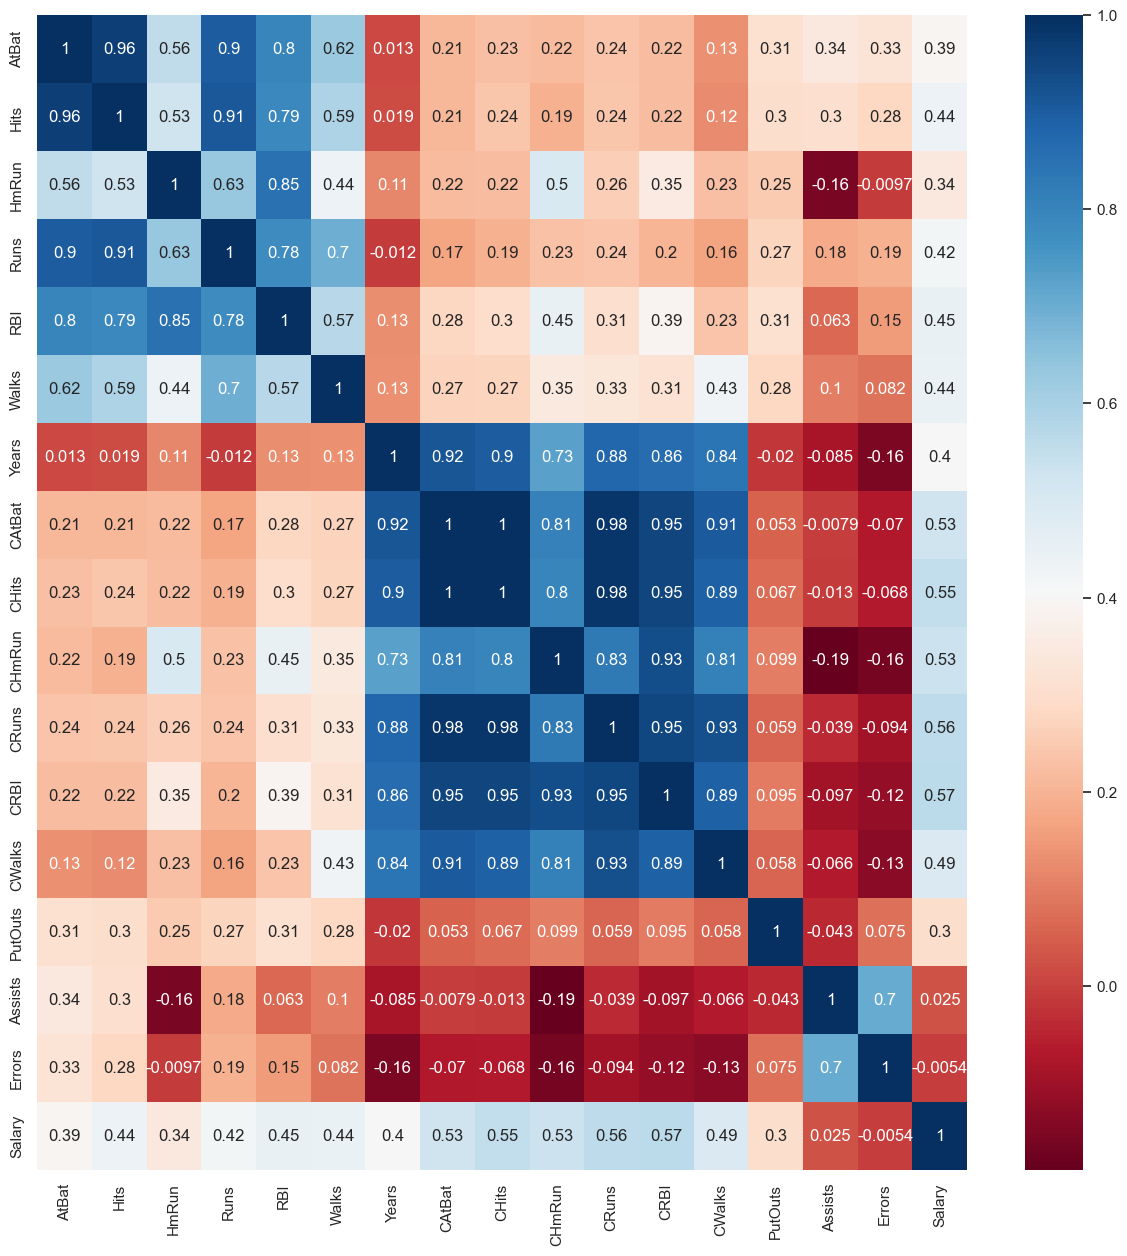

['Hits', 'Runs', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

In [1242]:
high_correlated_cols(df, plot=True)

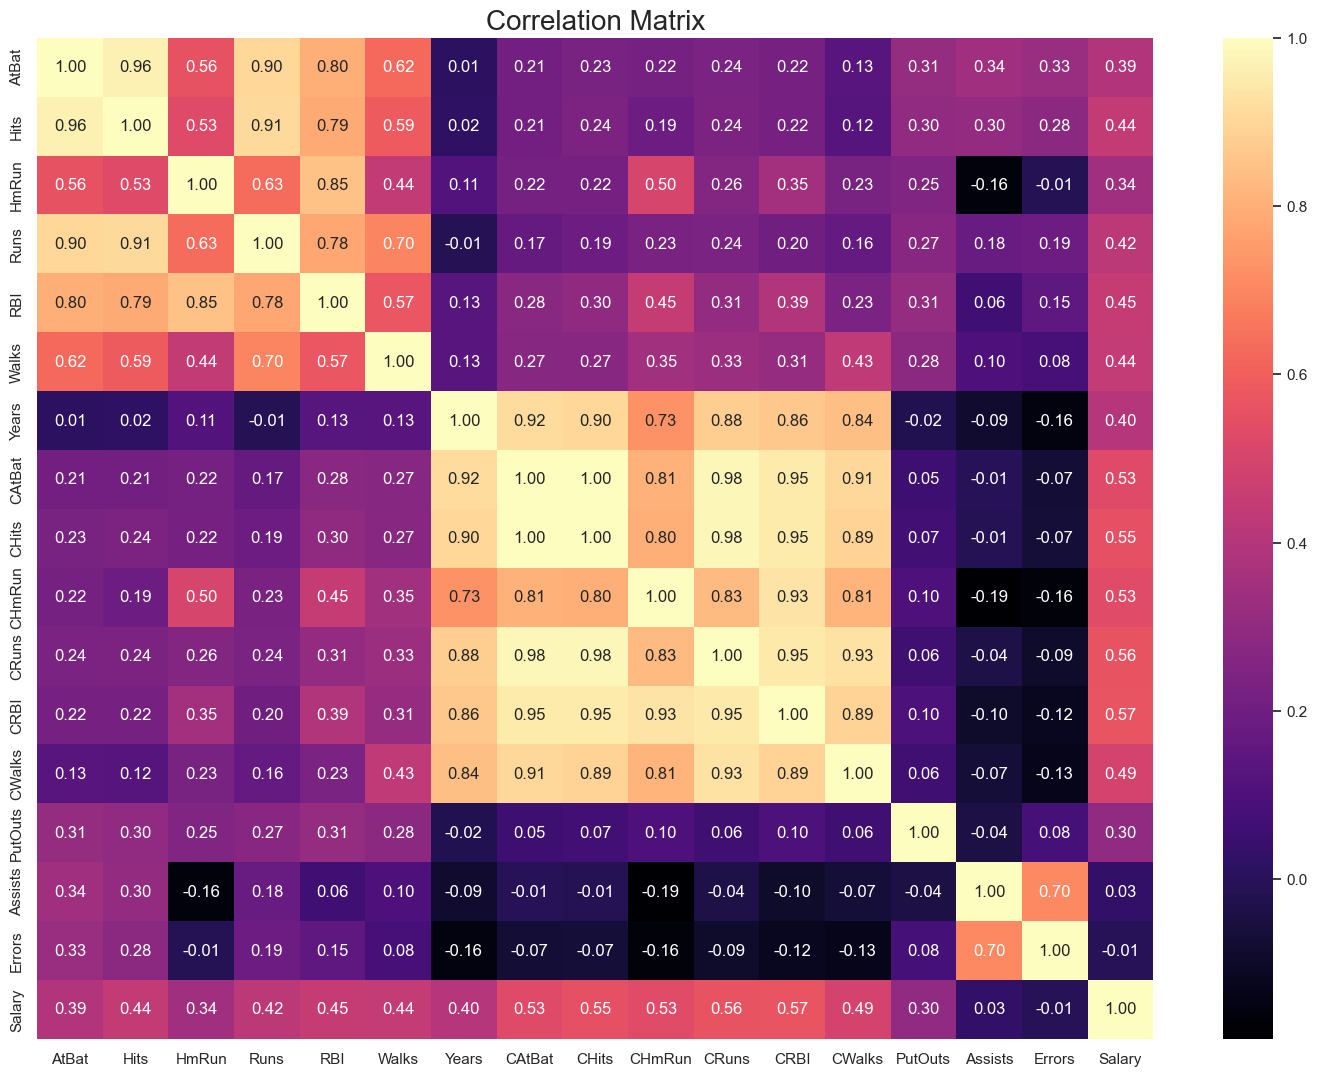

In [1243]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show(block=True)

# Feautre Engineering

In [1244]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835.00,69.00,321,414,375.00,N,W,632,43,10,475.00,N
2,479,130,18,66,72,76,3,1624,457.00,63.00,224,266,263.00,A,W,880,82,14,480.00,A
3,496,141,20,65,78,37,11,5628,1575.00,225.00,828,838,354.00,N,E,200,11,3,500.00,N
4,321,87,10,39,42,30,2,396,101.00,12.00,48,46,33.00,N,E,805,40,4,91.50,N
5,594,169,4,74,51,35,11,4408,1133.00,19.00,501,336,194.00,A,W,282,421,25,750.00,A


In [1245]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 20
Categorical Columns: 3
Numeric Columns: 17
Categorical Looking but Cardinal: 0
Numeric Looking but Categorical: 0


In [1246]:
new_num_cols = [col for col in num_cols if col not in ["Salary"]]

In [1247]:
df[new_num_cols] = df[new_num_cols] + 0.000000001

In [1248]:
df.columns = [col.upper() for col in df.columns]

In [1249]:
df.columns

Index(['ATBAT', 'HITS', 'HMRUN', 'RUNS', 'RBI', 'WALKS', 'YEARS', 'CATBAT',
       'CHITS', 'CHMRUN', 'CRUNS', 'CRBI', 'CWALKS', 'LEAGUE', 'DIVISION',
       'PUTOUTS', 'ASSISTS', 'ERRORS', 'SALARY', 'NEWLEAGUE'],
      dtype='object')

In [1250]:
df.head()

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE
1,315.00,81.00,7.00,24.00,38.00,39.00,14.00,3449.00,835.00,69.00,321.00,414.00,375.00,N,W,632.00,43.00,10.00,475.00,N
2,479.00,130.00,18.00,66.00,72.00,76.00,3.00,1624.00,457.00,63.00,224.00,266.00,263.00,A,W,880.00,82.00,14.00,480.00,A
3,496.00,141.00,20.00,65.00,78.00,37.00,11.00,5628.00,1575.00,225.00,828.00,838.00,354.00,N,E,200.00,11.00,3.00,500.00,N
4,321.00,87.00,10.00,39.00,42.00,30.00,2.00,396.00,101.00,12.00,48.00,46.00,33.00,N,E,805.00,40.00,4.00,91.50,N
5,594.00,169.00,4.00,74.00,51.00,35.00,11.00,4408.00,1133.00,19.00,501.00,336.00,194.00,A,W,282.00,421.00,25.00,750.00,A


In [1251]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 20
Categorical Columns: 3
Numeric Columns: 17
Categorical Looking but Cardinal: 0
Numeric Looking but Categorical: 0


In [1252]:
# CAREER ATBAT RATIO
df["NEW_C_ATBAT_RATIO"] = df["ATBAT"] / df["CATBAT"]

In [1253]:
# CAREER HITS RATIO
df["NEW_C_HITS_RATIO"] = df["HITS"] / df["CHITS"]

In [1254]:
# CAREER HMRUN RATIO
df["NEW_C_HMRUN_RATIO"] = df["HMRUN"] / df["CHMRUN"]

In [1255]:
# CAREER RUNS RATIO
df["NEW_C_RUNS_RATIO"] = df["RUNS"] / df["CRUNS"]

In [1256]:
# CAREER CRBI RATIO
df["NEW_C_RBI_RATIO"] = df["RBI"] / df["CRBI"]

In [1257]:
# CAREER CWALKS RATIO
df["NEW_C_WALKS_RATIO"] = df["WALKS"] / df["CWALKS"]

In [1258]:
# PLAYER LEVEL
df.loc[(df["YEARS"]<=2.0),"NEW_YEARS_LEVEL"] ="JUNIOR"
df.loc[(df["YEARS"]>2) & (df["YEARS"]<=5),"NEW_YEARS_LEVEL"] ="MID"
df.loc[(df["YEARS"]>5) & (df["YEARS"]<=10),"NEW_YEARS_LEVEL"] ="SENIOR"
df.loc[(df["YEARS"]>10) ,"NEW_YEARS_LEVEL"] ="EXPERT"

In [1259]:
# PLAYER LEVEL X DIVISION
df.loc[(df["NEW_YEARS_LEVEL"] =="JUNIOR") & (df["DIVISION"] == "E"),"NEW_DIV_CAT"] = "JUNIOR-EAST"
df.loc[(df["NEW_YEARS_LEVEL"] =="JUNIOR") & (df["DIVISION"] == "W"),"NEW_DIV_CAT"] = "JUNIOR-WEST"

df.loc[(df["NEW_YEARS_LEVEL"] =="MID") & (df["DIVISION"] == "E"),"NEW_DIV_CAT"] = "MID-EAST"
df.loc[(df["NEW_YEARS_LEVEL"] =="MID") & (df["DIVISION"] == "W"),"NEW_DIV_CAT"] = "MID-WEST"

df.loc[(df["NEW_YEARS_LEVEL"] =="SENIOR") & (df["DIVISION"] == "E"),"NEW_DIV_CAT"] = "SENIOR-EAST"
df.loc[(df["NEW_YEARS_LEVEL"] =="SENIOR") & (df["DIVISION"] == "W"),"NEW_DIV_CAT"] = "SENIOR-WEST"

df.loc[(df["NEW_YEARS_LEVEL"] =="EXPERT") & (df["DIVISION"] == "E"),"NEW_DIV_CAT"] = "EXPERT-EAST"
df.loc[(df["NEW_YEARS_LEVEL"] =="EXPERT") & (df["DIVISION"] == "W"),"NEW_DIV_CAT"] = "EXPERT-WEST"

In [1260]:
# Player Promotion to Next League
df.loc[(df["LEAGUE"] == "N") &(df["NEWLEAGUE"] == "N"),"NEW_PLAYER_PROGRESS" ] = "STANDART_N"
df.loc[(df["LEAGUE"] == "A") &(df["NEWLEAGUE"] == "A"),"NEW_PLAYER_PROGRESS" ] = "STANDART_A"
df.loc[(df["LEAGUE"] == "A") &(df["NEWLEAGUE"] == "N"),"NEW_PLAYER_PROGRESS" ] = "ASCENDING"
df.loc[(df["LEAGUE"] == "N") &(df["NEWLEAGUE"] == "A"),"NEW_PLAYER_PROGRESS" ] = "DESCENDING"

In [1261]:
# PUTOUTS * ASSISTS
df["NEW_PUTOUTS*ASSISTS"] = df["PUTOUTS"] / df["ASSISTS"]

In [1262]:
# SEASON HIT RATE
df["NEW_HITS_div_ATBAT"] = df["HITS"] / df["ATBAT"]

In [1263]:
# SEASON HMRUN RATE
df["NEW_HMRUN_div_HITS"] = df["HMRUN"] / df["HITS"]

In [1264]:
# CARRER HIT RATE
df["NEW_CHITS_div_CATBAT"] = df["CHITS"] / df["CATBAT"]

In [1265]:
# CARRER HMRUN RATE
df["NEW_CHMRUN_div_CHITS"] = df["CHMRUN"] / df["CHITS"]

In [1266]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 34
Categorical Columns: 6
Numeric Columns: 28
Categorical Looking but Cardinal: 0
Numeric Looking but Categorical: 0


## Label Encoding

In [1267]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [1268]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
              and df[col].nunique() == 2]

In [1269]:
binary_cols


['LEAGUE', 'DIVISION', 'NEWLEAGUE']

In [1270]:
for col in binary_cols:
    label_encoder(df, col)

## Rare Endcoding

In [1271]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [1272]:
rare_analyser(df, "SALARY", cat_cols)

LEAGUE : 2
   COUNT  RATIO  TARGET_MEAN
0    139   0.53       542.00
1    124   0.47       529.12


DIVISION : 2
   COUNT  RATIO  TARGET_MEAN
0    129   0.49       624.27
1    134   0.51       450.88


NEWLEAGUE : 2
   COUNT  RATIO  TARGET_MEAN
0    141   0.54       537.11
1    122   0.46       534.55


NEW_YEARS_LEVEL : 4
        COUNT  RATIO  TARGET_MEAN
EXPERT     77   0.29       747.54
JUNIOR     17   0.06       149.65
MID        73   0.28       243.57
SENIOR     96   0.37       656.90


NEW_DIV_CAT : 8
             COUNT  RATIO  TARGET_MEAN
EXPERT-EAST     38   0.14       811.51
EXPERT-WEST     39   0.15       685.21
JUNIOR-EAST      5   0.02        80.00
JUNIOR-WEST     12   0.05       178.67
MID-EAST        34   0.13       276.80
MID-WEST        39   0.15       214.60
SENIOR-EAST     52   0.20       766.96
SENIOR-WEST     44   0.17       526.83


NEW_PLAYER_PROGRESS : 4
            COUNT  RATIO  TARGET_MEAN
ASCENDING       8   0.03       558.12
DESCENDING     10   0.04       486

In [1273]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
        
    return temp_df

In [1274]:
df = rare_encoder(df, 0.01)

## One Hot Encoding

In [1275]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 34
Categorical Columns: 6
Numeric Columns: 28
Categorical Looking but Cardinal: 0
Numeric Looking but Categorical: 3


In [1276]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [1277]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]


In [1278]:
ohe_cols

['NEW_YEARS_LEVEL', 'NEW_DIV_CAT', 'NEW_PLAYER_PROGRESS']

In [1279]:
df = one_hot_encoder(df, ohe_cols, drop_first=True)
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 44
Categorical Columns: 16
Numeric Columns: 28
Categorical Looking but Cardinal: 0
Numeric Looking but Categorical: 16


## Standardize for numeric variables.

In [1280]:
num_cols

['ATBAT',
 'HITS',
 'HMRUN',
 'RUNS',
 'RBI',
 'WALKS',
 'YEARS',
 'CATBAT',
 'CHITS',
 'CHMRUN',
 'CRUNS',
 'CRBI',
 'CWALKS',
 'PUTOUTS',
 'ASSISTS',
 'ERRORS',
 'SALARY',
 'NEW_C_ATBAT_RATIO',
 'NEW_C_HITS_RATIO',
 'NEW_C_HMRUN_RATIO',
 'NEW_C_RUNS_RATIO',
 'NEW_C_RBI_RATIO',
 'NEW_C_WALKS_RATIO',
 'NEW_PUTOUTS*ASSISTS',
 'NEW_HITS_div_ATBAT',
 'NEW_HMRUN_div_HITS',
 'NEW_CHITS_div_CATBAT',
 'NEW_CHMRUN_div_CHITS']

In [1281]:
num_cols.remove("SALARY")

In [1282]:
df[num_cols].head()

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,...,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RUNS_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_PUTOUTS*ASSISTS,NEW_HITS_div_ATBAT,NEW_HMRUN_div_HITS,NEW_CHITS_div_CATBAT,NEW_CHMRUN_div_CHITS
1,315.00,81.00,7.00,24.00,38.00,39.00,14.00,3449.00,835.00,69.00,...,0.10,0.10,0.07,0.09,0.10,14.70,0.26,0.09,0.24,0.08
2,479.00,130.00,18.00,66.00,72.00,76.00,3.00,1624.00,457.00,63.00,...,0.28,0.29,0.29,0.27,0.29,10.73,0.27,0.14,0.28,0.14
3,496.00,141.00,20.00,65.00,78.00,37.00,11.00,5628.00,1575.00,225.00,...,0.09,0.09,0.08,0.09,0.10,18.18,0.28,0.14,0.28,0.14
4,321.00,87.00,10.00,39.00,42.00,30.00,2.00,396.00,101.00,12.00,...,0.86,0.83,0.81,0.91,0.91,20.12,0.27,0.11,0.26,0.12
5,594.00,169.00,4.00,74.00,51.00,35.00,11.00,4408.00,1133.00,19.00,...,0.15,0.21,0.15,0.15,0.18,0.67,0.28,0.02,0.26,0.02


In [1283]:
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])


In [1284]:
df[num_cols]

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,...,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RUNS_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_PUTOUTS*ASSISTS,NEW_HITS_div_ATBAT,NEW_HMRUN_div_HITS,NEW_CHITS_div_CATBAT,NEW_CHMRUN_div_CHITS
1,-0.40,-0.31,-0.15,-0.71,-0.22,0.06,1.33,0.50,0.38,0.37,...,-0.33,-0.38,-0.40,-0.36,-0.36,0.20,-0.14,-0.15,-0.65,-0.00
2,0.27,0.39,0.69,0.35,0.61,1.15,-0.50,-0.10,-0.07,0.30,...,0.24,0.13,0.21,0.15,0.20,0.04,0.27,0.36,0.60,0.62
3,0.34,0.54,0.85,0.33,0.76,0.00,0.83,1.21,1.26,2.39,...,-0.35,-0.41,-0.39,-0.35,-0.36,0.35,0.63,0.39,0.55,0.67
4,-0.38,-0.23,0.08,-0.33,-0.12,-0.21,-0.67,-0.50,-0.49,-0.36,...,1.98,1.63,1.65,1.97,2.10,0.43,0.26,0.13,-0.24,0.40
5,0.74,0.94,-0.38,0.56,0.10,-0.06,0.83,0.81,0.73,-0.27,...,-0.17,-0.08,-0.20,-0.19,-0.13,-0.39,0.64,-0.76,-0.18,-0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.34,0.34,-0.15,0.33,0.02,0.00,-0.17,0.25,0.34,-0.10,...,-0.14,-0.05,-0.13,-0.18,0.14,1.11,-0.18,-0.45,1.13,-0.48
318,0.32,0.47,-0.31,0.61,0.07,1.68,1.00,1.17,1.18,-0.01,...,-0.35,-0.30,-0.37,-0.30,-0.35,-0.38,0.41,-0.63,0.37,-0.64
319,0.25,0.33,-0.46,0.23,-0.10,0.44,0.00,-0.08,-0.10,-0.43,...,0.26,0.52,0.17,0.69,0.41,-0.40,0.09,-0.76,-0.25,-0.74
320,0.66,0.59,0.00,0.84,0.32,1.21,0.33,0.42,0.40,0.74,...,-0.11,-0.40,-0.10,-0.21,0.04,0.01,-0.30,-0.38,0.17,0.34


## Build the Model

In [1285]:
y = df[["SALARY"]]
X = df.drop("SALARY", axis=1)

In [1286]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=17)

In [1287]:
from sklearn.ensemble import RandomForestRegressor

In [1288]:
rf_model = RandomForestRegressor(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

## Feautre Importance

In [1289]:
def plot_importance(model, features, num = len(X), save = False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_,
                               "Feature" : features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y ="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending = False)[0:num])
    
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

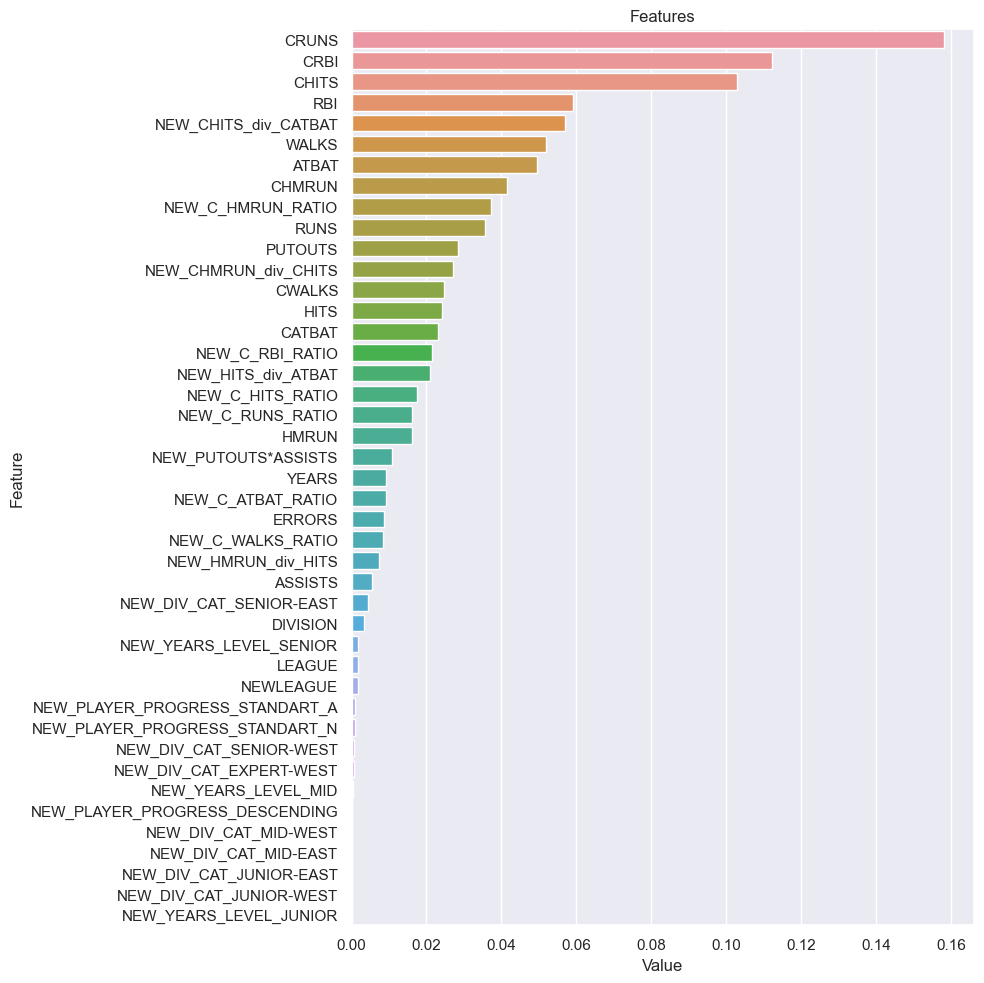

In [1290]:
plot_importance(rf_model, X_train)

# Multiple Linear Regression

In [1291]:
df.head()

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,...,NEW_DIV_CAT_EXPERT-WEST,NEW_DIV_CAT_JUNIOR-EAST,NEW_DIV_CAT_JUNIOR-WEST,NEW_DIV_CAT_MID-EAST,NEW_DIV_CAT_MID-WEST,NEW_DIV_CAT_SENIOR-EAST,NEW_DIV_CAT_SENIOR-WEST,NEW_PLAYER_PROGRESS_DESCENDING,NEW_PLAYER_PROGRESS_STANDART_A,NEW_PLAYER_PROGRESS_STANDART_N
1,-0.40,-0.31,-0.15,-0.71,-0.22,0.06,1.33,0.50,0.38,0.37,...,1,0,0,0,0,0,0,0,0,1
2,0.27,0.39,0.69,0.35,0.61,1.15,-0.50,-0.10,-0.07,0.30,...,0,0,0,0,1,0,0,0,1,0
3,0.34,0.54,0.85,0.33,0.76,0.00,0.83,1.21,1.26,2.39,...,0,0,0,0,0,0,0,0,0,1
4,-0.38,-0.23,0.08,-0.33,-0.12,-0.21,-0.67,-0.50,-0.49,-0.36,...,0,0,0,1,0,0,0,0,0,1
5,0.74,0.94,-0.38,0.56,0.10,-0.06,0.83,0.81,0.73,-0.27,...,1,0,0,0,0,0,0,0,1,0


In [1292]:
y = df[["SALARY"]]
X = df.drop("SALARY", axis=1)

In [1293]:
y

,SALARY
1,475.00
2,480.00
3,500.00
4,91.50
5,750.00
...,...
317,700.00
318,875.00
319,385.00
320,960.00


In [1294]:
X

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,...,NEW_DIV_CAT_EXPERT-WEST,NEW_DIV_CAT_JUNIOR-EAST,NEW_DIV_CAT_JUNIOR-WEST,NEW_DIV_CAT_MID-EAST,NEW_DIV_CAT_MID-WEST,NEW_DIV_CAT_SENIOR-EAST,NEW_DIV_CAT_SENIOR-WEST,NEW_PLAYER_PROGRESS_DESCENDING,NEW_PLAYER_PROGRESS_STANDART_A,NEW_PLAYER_PROGRESS_STANDART_N
1,-0.40,-0.31,-0.15,-0.71,-0.22,0.06,1.33,0.50,0.38,0.37,...,1,0,0,0,0,0,0,0,0,1
2,0.27,0.39,0.69,0.35,0.61,1.15,-0.50,-0.10,-0.07,0.30,...,0,0,0,0,1,0,0,0,1,0
3,0.34,0.54,0.85,0.33,0.76,0.00,0.83,1.21,1.26,2.39,...,0,0,0,0,0,0,0,0,0,1
4,-0.38,-0.23,0.08,-0.33,-0.12,-0.21,-0.67,-0.50,-0.49,-0.36,...,0,0,0,1,0,0,0,0,0,1
5,0.74,0.94,-0.38,0.56,0.10,-0.06,0.83,0.81,0.73,-0.27,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.34,0.34,-0.15,0.33,0.02,0.00,-0.17,0.25,0.34,-0.10,...,0,0,0,0,0,1,0,0,0,1
318,0.32,0.47,-0.31,0.61,0.07,1.68,1.00,1.17,1.18,-0.01,...,0,0,0,0,0,0,0,0,1,0
319,0.25,0.33,-0.46,0.23,-0.10,0.44,0.00,-0.08,-0.10,-0.43,...,0,0,0,0,0,0,1,0,1,0
320,0.66,0.59,0.00,0.84,0.32,1.21,0.33,0.42,0.40,0.74,...,0,0,0,0,0,1,0,0,1,0


In [1295]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=1)

In [1296]:
reg_model = LinearRegression().fit(X_train, y_train)

In [1297]:
#  (b - bias)
reg_model.intercept_

array([584.54123748])

In [1298]:
# coefficients (w - weights)
reg_model.coef_

array([[-6.79283322e+02,  5.99644725e+02,  1.32469586e+02,
         7.03931167e+01,  7.99157857e+01,  9.21250578e+01,
        -1.78315824e+02, -1.82619628e+03,  1.93526620e+03,
         2.45227076e+02, -1.42312739e+02, -1.28878605e+02,
         7.67695603e+01, -3.28599013e+01, -8.15114867e+01,
         4.16095739e+01, -3.25977751e+01,  6.72902028e+01,
         5.45828163e+01,  5.52191359e+02, -2.85924418e+02,
         5.63171823e+01, -3.97368114e+02, -1.88944927e+02,
        -2.73465683e+01,  7.16154941e-08, -1.25536116e+02,
        -1.43003992e+02, -1.19462796e+01, -1.48583538e+01,
        -5.68973901e+01, -1.33741410e+02, -2.03548560e+01,
        -1.20926860e+01, -5.74176493e+01,  5.20259219e-01,
        -9.65163935e+01, -3.72250167e+01,  1.23591872e+01,
        -3.27140432e+01, -1.13664017e+01, -4.32164146e+01,
        -2.14934996e+01]])

In [1299]:
# inner product
np.inner(X_train.iloc[2,:].values, reg_model.coef_) + reg_model.intercept_

array([665.2279028])

In [1300]:
y_train.iloc[2]

SALARY   600.00
Name: 23, dtype: float64

In [1301]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))

204.57332514451483

In [1302]:
mean_absolute_error(y_train,y_pred)

148.53511518035688

In [1303]:
smape = mean_absolute_error(y_train, y_pred) / y_train.mean()
smape

SALARY   0.28
dtype: float64

In [1304]:
# TRAIN RSQUARE
reg_model.score(X_train, y_train)

0.786555375161769

In [1305]:
y_pred = reg_model.predict(X_test)

In [1306]:
# test RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

353.83104098640456

In [1307]:
mean_absolute_error(y_test,y_pred)

247.16390569790215

In [1308]:
# Test RSQUARE
reg_model.score(X_test, y_test)

0.45336865480471134

In [1309]:
np.mean(np.sqrt(-cross_val_score(reg_model,
                                X,
                                y,
                                cv = 10,
                                scoring = "neg_mean_squared_error")))

282.425417540554

In [1310]:
np.mean(np.sqrt(-cross_val_score(reg_model,
                                X,
                                y,
                                cv = 5,
                                scoring = "neg_mean_squared_error")))

284.724771370393

In [1311]:
def plot_importance(model, features, num = len(X), save = False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_,
                               "Feature" : features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y ="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending = False)[0:num])
    
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

In [1312]:
plot_importance(reg_model, X_train)

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'